In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
#from pandas_profiling import ProfileReport 
#import sweetviz as sv
#import dtale
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
#from sklearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import xgboost as xgb


In [2]:
DecisionTreeClassifier =DecisionTreeClassifier(random_state=0)
RandomForest =RandomForestClassifier( random_state=0,)
AdaBoost = AdaBoostClassifier(random_state=0)
Regression_logistic=LogisticRegression(random_state = 0)
SVM = SVC(random_state=0)
KNN = KNeighborsClassifier()
XGboost = XGBClassifier()

In [3]:
dict_of_models = {'DecisionTreeClassifier':DecisionTreeClassifier,
                  'RandomForest': RandomForest,
                  'AdaBoost' : AdaBoost,
                  'XGboost':XGboost,
                  'Regression_logistic':Regression_logistic,
                  'SVM': SVM,
                  'KNN': KNN
                  
                 }

In [4]:
def evaluation(model):
    
    model.fit(X1_train, y1_train)
    ypred = model.predict(X1_test)
    
    print(confusion_matrix(y1_test, ypred))
    
    print(classification_report(y1_test, ypred))
    print('=======================================================')

In [5]:
def evaluation2(model):
    
    model.fit(X2_train, y2_train)
    y2pred = model.predict(X2_test)
    
    print(confusion_matrix(y2_test, y2pred))
    print(classification_report(y2_test, y2pred))
    print('=======================================================')

In [6]:
def evaluation_c(model):
    
    model.fit(Xc_train, yc_train)
    ycpred = model.predict(Xc_test)
    
    print(confusion_matrix(yc_test, ycpred))
    print(classification_report(yc_test, ycpred))
    print('=======================================================')

In [7]:
def evaluation_s(model):
    
    model.fit(Xs_train, ys_train)
    yspred = model.predict(Xs_test)
    
    print(confusion_matrix(ys_test, yspred))
    print(classification_report(ys_test, yspred))
    print('=======================================================')

In [8]:
def evaluation_t(model):
    
    model.fit(Xt_train, yt_train)
    ytpred = model.predict(Xt_test)
    
    print(confusion_matrix(yt_test, ytpred))
    print(classification_report(yt_test, ytpred))
    print('=======================================================')

In [9]:
def importance(evaluation,X):
    for name,model in dict_of_models.items():
        liste=['Regression_logistic','KNN','SVM']
        if name in liste:
            print(name)
            evaluation(model)
        else:
            print(name)
            evaluation(model)
            O=pd.DataFrame(model.feature_importances_,index=X.columns)
            O.columns=['importance']
            O.sort_values(by='importance',inplace=True,ascending=False)
            display(O)

In [10]:
df1 = pd.read_csv('C:/Users/yazid.aissaoui/Desktop/Stage/Aqueduc/Aqueduc/Donnees_AqueducR1_Neg_fen_ch1_all.txt',delimiter="\t")#,index_col='Date')
df2 = pd.read_csv('C:/Users/yazid.aissaoui/Desktop/Stage/Aqueduc/Aqueduc/Donnees_AqueducR1_Neg_fen_ch2_all.txt',delimiter="\t")
dfc = pd.read_csv('C:/Users/yazid.aissaoui/Desktop/Stage/Aqueduc/Aqueduc/Donnees_AqueducR1_Neg_fen_cuisine_all.txt',delimiter="\t")
dfs = pd.read_csv('C:/Users/yazid.aissaoui/Desktop/Stage/Aqueduc/Aqueduc/Donnees_AqueducR1_Neg_fen_salon_all.txt',delimiter="\t")

meteo1 =pd.read_excel('C:/Users/yazid.aissaoui/Desktop/Stage/Aqueduc/Aqueduc/Donnees_meteo.xlsx',sheet_name='f',index_col='Date')
meteo =pd.read_excel('C:/Users/yazid.aissaoui/Desktop/Stage/Aqueduc/Aqueduc/Donnees_meteo.xlsx',sheet_name='f')

In [11]:
df11=pd.read_excel('C:/Users/yazid.aissaoui/Desktop/Stage/Aqueduc/Aqueduc/Fenetres_Aqueduc_R1.xlsx',sheet_name = "Ch1",index_col='Date')
df22=pd.read_excel('C:/Users/yazid.aissaoui/Desktop/Stage/Aqueduc/Aqueduc/Fenetres_Aqueduc_R1.xlsx',sheet_name = "Ch2",index_col='Date')
dfc1=pd.read_excel('C:/Users/yazid.aissaoui/Desktop/Stage/Aqueduc/Aqueduc/Fenetres_Aqueduc_R1.xlsx',sheet_name = "Cuisine",index_col='Date')
dfs1=pd.read_excel('C:/Users/yazid.aissaoui/Desktop/Stage/Aqueduc/Aqueduc/Fenetres_Aqueduc_R1.xlsx',sheet_name = "Salon",index_col='Date')
df=pd.concat([df11,df22,dfc1,dfs1],axis=1)
#df = df.loc[:,~df.columns.duplicated()]
df.dropna(axis = 0, how = 'any',inplace=True)

print('#========================== CHAMBRE 1  ============================#')
print('date de début d enregistrement des données')
display(df11.index.min()),print('          ----------')
print('date de fin d enregistrement des données')
display(df11.index.max()),print('          ----------')
print('la dimension du dataframe de la chambre  et de:' , )
display(df11.shape)
print('\n')
print('#========================== CHAMBRE 2  ============================#')
print('date de début d enregistrement des données')
display(df22.index.min()),print('          ----------')
print('date de fin d enregistrement des données')
display(df22.index.max()),print('          ----------')
print('la dimension du dataframe de la chambre  et de:' , )
display(df22.shape)
print('\n')
print('#========================== CUISINE ==============================#')
print('date de début d enregistrement des données')
display(dfc1.index.min()),print('         ----------')
print('date de fin d enregistrement des données')
display(dfc1.index.max()),print('         ----------')
print('la dimension du dataframe de la cuisine et de:' , )
display(dfc1.shape)
print('\n')
print('#========================== SALON ================================#')
print('date de début d enregistrement des données')
display(dfs1.index.min()),print('         ----------')
print('date de fin d enregistrement des données')
display(dfs1.index.max()),print('         ----------')
print('la dimension du dataframe du salon et de:' , )
display(dfs1.shape)
print('\n')
print('#======== df résultat de concatination (ch1,ch2,cuisine,salon) =========#')
print('date de début')  
display(df.index.min()),print('         ----------')
print('date de fin')
display(df.index.max()),print('         ----------')
print('la dimension de df :' , )
display(df.shape)
print('\n')
print('                                                   df')
display(df )
      

#========================== CHAMBRE 1  ============================#
date de début d enregistrement des données


Timestamp('2021-03-01 14:40:00')

          ----------
date de fin d enregistrement des données


Timestamp('2021-03-09 10:40:00')

          ----------
la dimension du dataframe de la chambre  et de:


(2257, 4)



#========================== CHAMBRE 2  ============================#
date de début d enregistrement des données


Timestamp('2021-03-01 14:40:00')

          ----------
date de fin d enregistrement des données


Timestamp('2021-03-09 10:35:00')

          ----------
la dimension du dataframe de la chambre  et de:


(2256, 4)



#========================== CUISINE ==============================#
date de début d enregistrement des données


Timestamp('2021-03-01 14:55:00')

         ----------
date de fin d enregistrement des données


Timestamp('2021-03-09 12:40:00')

         ----------
la dimension du dataframe de la cuisine et de:


(2278, 3)



#========================== SALON ================================#
date de début d enregistrement des données


Timestamp('2021-03-01 14:55:00')

         ----------
date de fin d enregistrement des données


Timestamp('2021-03-09 10:35:00')

         ----------
la dimension du dataframe du salon et de:


(2253, 4)



#======== df résultat de concatination (ch1,ch2,cuisine,salon) =========#
date de début


Timestamp('2021-03-01 15:00:00', freq='5T')

         ----------
date de fin


Timestamp('2021-03-09 10:35:00', freq='5T')

         ----------
la dimension de df :


(2252, 15)



                                                   df


fen_ch1  T_ch1  HR_ch1  CO2_ch1  fen_ch2  T_ch2  HR_ch2  \
Date                                                                           
2021-03-01 15:00:00      1.0   21.6    34.0    621.0      1.0   21.6    36.0   
2021-03-01 15:05:00      1.0   21.6    34.0    621.0      1.0   21.6    36.0   
2021-03-01 15:10:00      1.0   21.7    34.0    736.0      1.0   21.7    36.0   
2021-03-01 15:15:00      1.0   21.7    34.0    736.0      1.0   21.7    36.0   
2021-03-01 15:20:00      1.0   21.7    34.0    677.0      1.0   21.7    36.0   
...                      ...    ...     ...      ...      ...    ...     ...   
2021-03-09 10:15:00      0.0   21.1    23.0    504.0      1.0   21.2    24.0   
2021-03-09 10:20:00      0.0   21.1    23.0    459.0      1.0   21.2    24.0   
2021-03-09 10:25:00      0.0   21.1    23.0    459.0      1.0   21.2    24.0   
2021-03-09 10:30:00      0.0   21.1    23.0    457.0      1.0   21.2    24.0   
2021-03-09 10:35:00      0.0   21.1    23.0    457.0      1.0   21.2    24.0   

                     CO2_ch2  fen_cuisine  T_cuisine  HR_cuisine  fen_salon  \
Date                                                                          
2021-03-01 15:00:00    724.0          1.0     22.369      36.267        1.0   
2021-03-01 15:05:00    724.0          1.0     22.369      36.267        1.0   
2021-03-01 15:10:00    704.0          1.0     22.250      35.265        1.0   
2021-03-01 15:15:00    704.0          1.0     22.250      35.265        1.0   
2021-03-01 15:20:00    760.0          1.0     22.202      35.525        1.0   
...                      ...          ...        ...         ...        ...   
2021-03-09 10:15:00    431.0          1.0     22.250      23.842        1.0   
2021-03-09 10:20:00    447.0          1.0     22.369      23.748        1.0   
2021-03-09 10:25:00    447.0          1.0     22.369      23.748        1.0   
2021-03-09 10:30:00    447.0          1.0     22.298      25.447        1.0   
2021-03-09 10:35:00    447.0          1.0     22.298      25.447        1.0   

                     T_salon  HR_salon  CO2_salon  
Date                                               
2021-03-01 15:00:00     21.7      36.0      824.0  
2021-03-01 15:05:00     21.7      36.0      824.0  
2021-03-01 15:10:00     21.8      37.0      989.0  
2021-03-01 15:15:00     21.8      37.0      989.0  
2021-03-01 15:20:00     21.9      37.0     1066.0  
...                      ...       ...        ...  
2021-03-09 10:15:00     21.2      25.0      523.0  
2021-03-09 10:20:00     21.3      25.0      516.0  
2021-03-09 10:25:00     21.3      25.0      516.0  
2021-03-09 10:30:00     21.3      25.0      516.0  
2021-03-09 10:35:00     21.3      25.0      516.0  

[2252 rows x 15 columns]

In [12]:
print('    ##================ info df1 ==============##'),df1.info(),print('    ##================ info df2 ==============##'),df2.info(),print('    ##================ info dfc ==============##'),dfc.info(),print('    ##================ info dfs ==============##'),dfs.info(),print('    ##================ info meteo ==============##'),meteo.info(),print('    ##================ info df ==============##'),df.info()

    ##================ info df1 ==============##
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2257 entries, 0 to 2256
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           2257 non-null   object
 1   fen_chambre 1  2257 non-null   int64 
 2   T_ch1          2257 non-null   object
 3   HR_ch1         2257 non-null   int64 
 4   CO2_ch1        2257 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 88.3+ KB
    ##================ info df2 ==============##
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           2256 non-null   object
 1   fen_chambre 2  2256 non-null   int64 
 2   T_ch2          2256 non-null   object
 3   HR_ch2         2256 non-null   int64 
 4   CO2_ch2        2256 non-null   int64 
dtypes: int64(3), object(2)
memory us

(None, None, None, None, None, None, None, None, None, None, None, None)

In [12]:
#======================================#
A=meteo.loc[meteo['Date'].isin(df1['Date'])]
B=meteo.loc[meteo['Date'].isin(df2['Date'])]
C=meteo.loc[meteo['Date'].isin(dfc['Date'])]
D=meteo.loc[meteo['Date'].isin(dfs['Date'])]
#=======================================#
AA=A.reset_index()
BB=B.reset_index()
CC=C.reset_index()
DD=D.reset_index()
#=======================================#
AA.drop(['index'],axis=1,inplace=True)
BB.drop(['index'],axis=1,inplace=True)
CC.drop(['index'],axis=1,inplace=True)
DD.drop(['index'],axis=1,inplace=True)
#=======================================#
df1=pd.concat([AA,df1],axis=1)
df1 = df1.loc[:,~df1.columns.duplicated()]
          #================#
df2=pd.concat([BB,df2],axis=1)
df2 = df2.loc[:,~df2.columns.duplicated()]
          #================#      
dfc=pd.concat([CC,dfc],axis=1)
dfc = dfc.loc[:,~dfc.columns.duplicated()]
          #================#
dfs=pd.concat([DD,dfs],axis=1)
dfs = dfs.loc[:,~dfs.columns.duplicated()]
#=======================================#






In [13]:
df1['T_ch1'].replace(',','.',regex=True,inplace=True)
df1['T_ch1']=df1['T_ch1'].astype(float)
##==========================================##
df2['T_ch2'].replace(',','.',regex=True,inplace=True)
df2['T_ch2']=df2['T_ch2'].astype(float)
##==========================================##
dfc['T_cuisine'].replace(',','.',regex=True,inplace=True)
dfc['T_cuisine']=dfc['T_cuisine'].astype(float)
                 #===========#
dfc['HR_cuisine'].replace(',','.',regex=True,inplace=True)
dfc['HR_cuisine']=dfc['HR_cuisine'].astype(float)
##==========================================##
dfs['T_salon'].replace(',','.',regex=True,inplace=True)
dfs['T_salon']=dfs['T_salon'].astype(float)


In [14]:
df1

Date    Evg  HR_ext   Wd   Ws  T_ext  fen_chambre 1  \
0    2021-03-01 14:40:00  52330      37  140  2.5   16.5              1   
1    2021-03-01 14:45:00  51880      36  157  0.9   16.7              1   
2    2021-03-01 14:50:00  51390      33  165  1.4   16.4              1   
3    2021-03-01 14:55:00  50110      28  167  3.3   16.3              1   
4    2021-03-01 15:00:00  49200      25  132  3.1   16.3              1   
...                  ...    ...     ...  ...  ...    ...            ...   
2252 2021-03-09 10:20:00  54800      47  333  3.0    6.6              0   
2253 2021-03-09 10:25:00  37240      46  295  2.6    6.7              0   
2254 2021-03-09 10:30:00  40450      47  321  1.3    6.6              0   
2255 2021-03-09 10:35:00  32670      47   10  2.5    6.8              0   
2256 2021-03-09 10:40:00  31850      48  343  2.7    6.6              0   

      T_ch1  HR_ch1  CO2_ch1  
0      21.7      35      664  
1      21.7      35      664  
2      21.6      35      669  
3      21.6      35      669  
4      21.6      34      621  
...     ...     ...      ...  
2252   21.1      23      459  
2253   21.1      23      459  
2254   21.1      23      457  
2255   21.1      23      457  
2256   21.1      23      457  

[2257 rows x 10 columns]

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

2022-05-16 13:52:16,427 - WARNING  - findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.
2022-05-16 13:52:16,627 - WARNING  - findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.


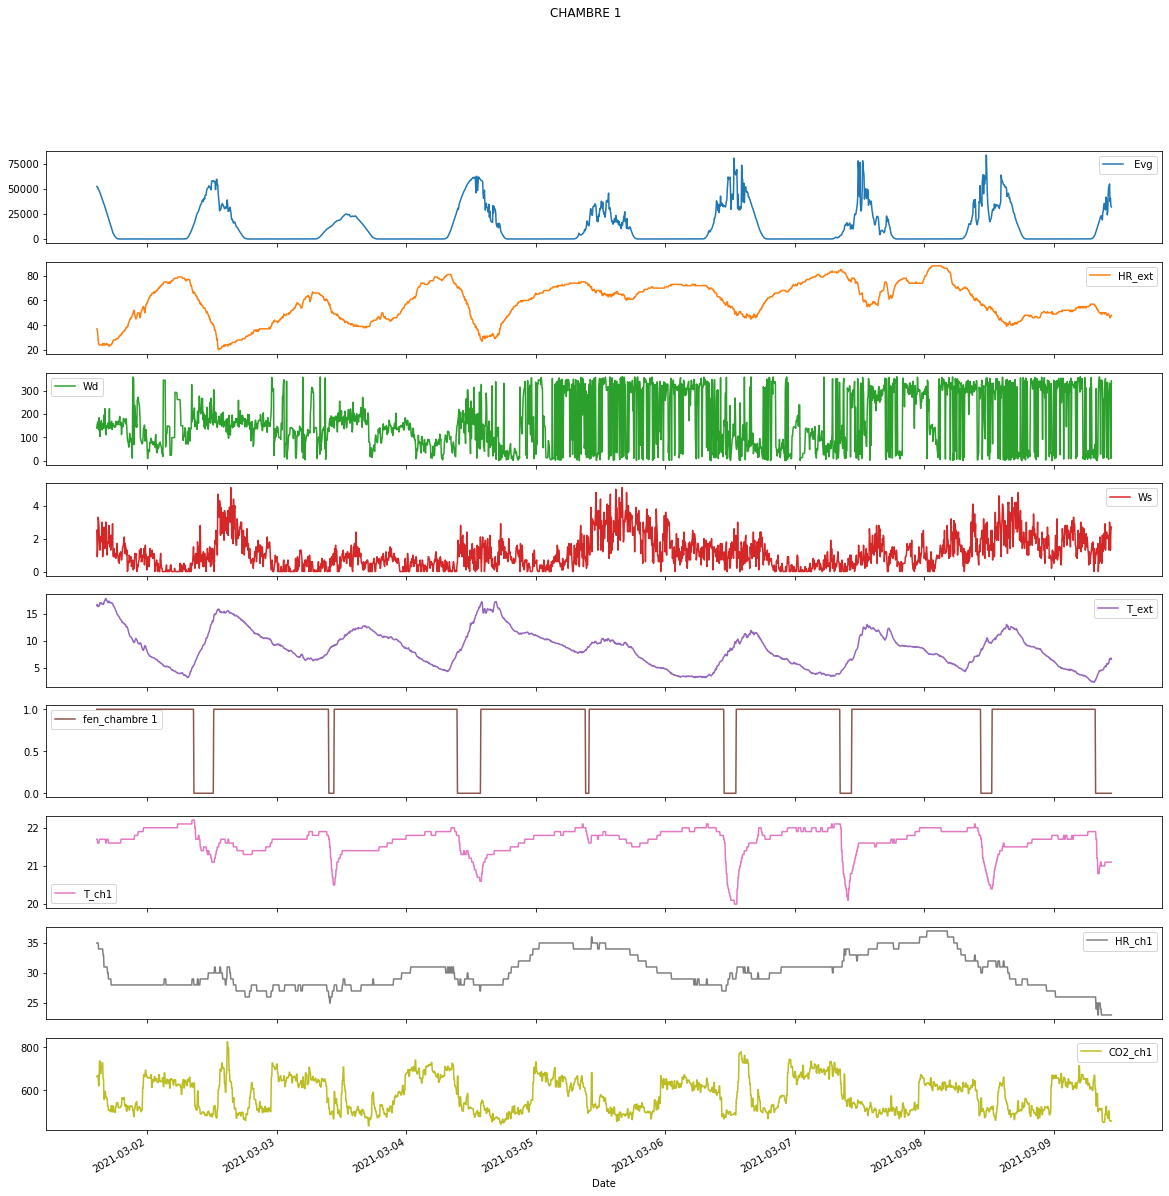

In [22]:
df1.plot(x='Date',x_compat=True,subplots=True,figsize=(20,20),title='CHAMBRE 1')

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

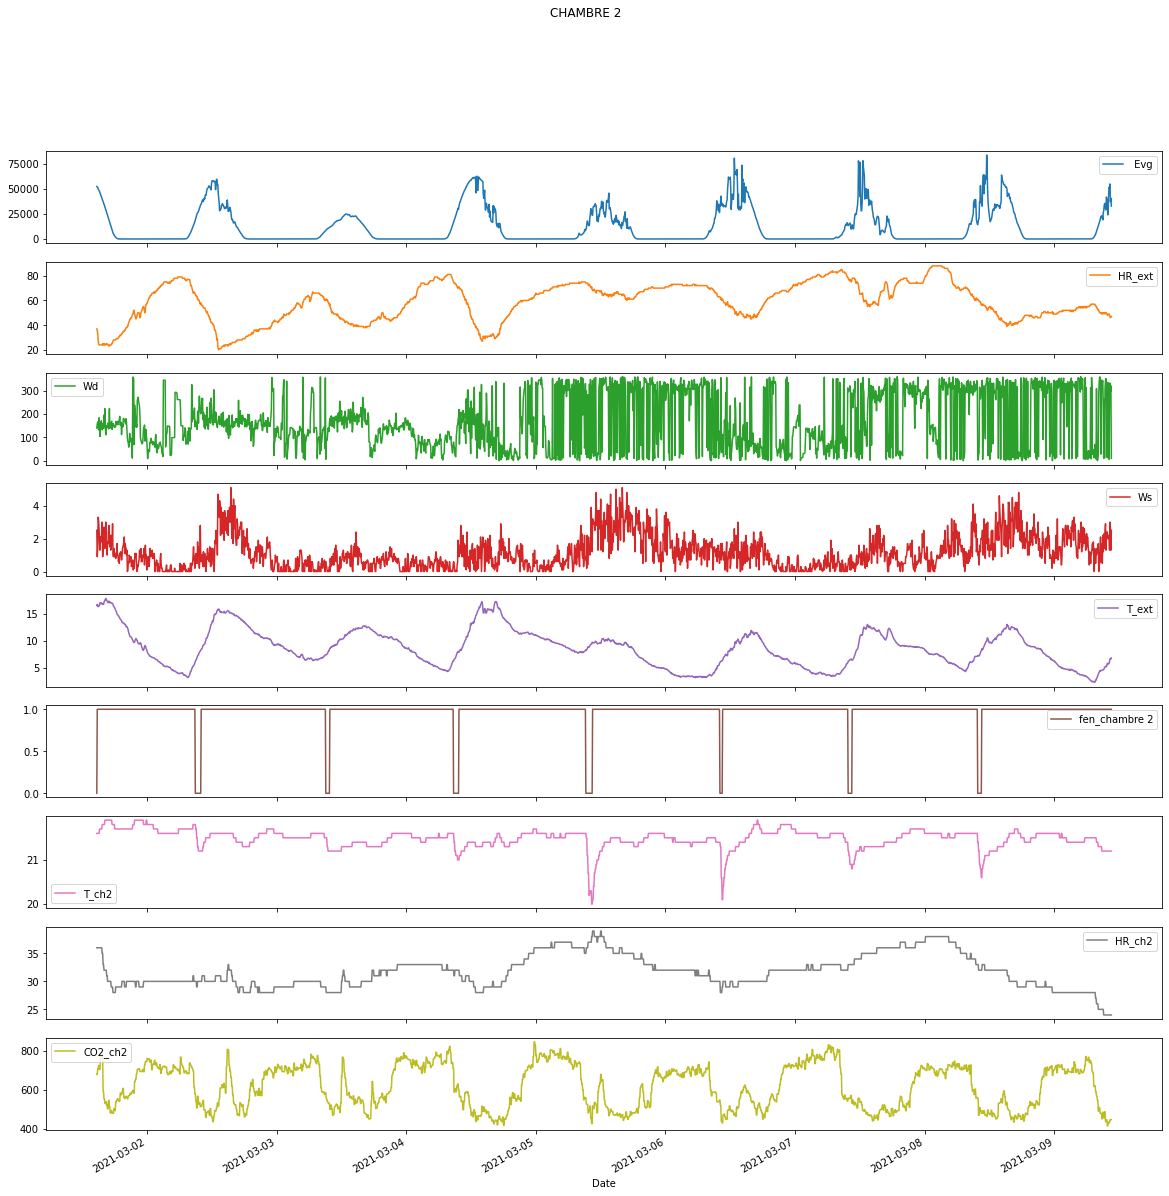

In [23]:
df2.plot(x='Date',x_compat=True,subplots=True,figsize=(20,20),title='CHAMBRE 2')

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

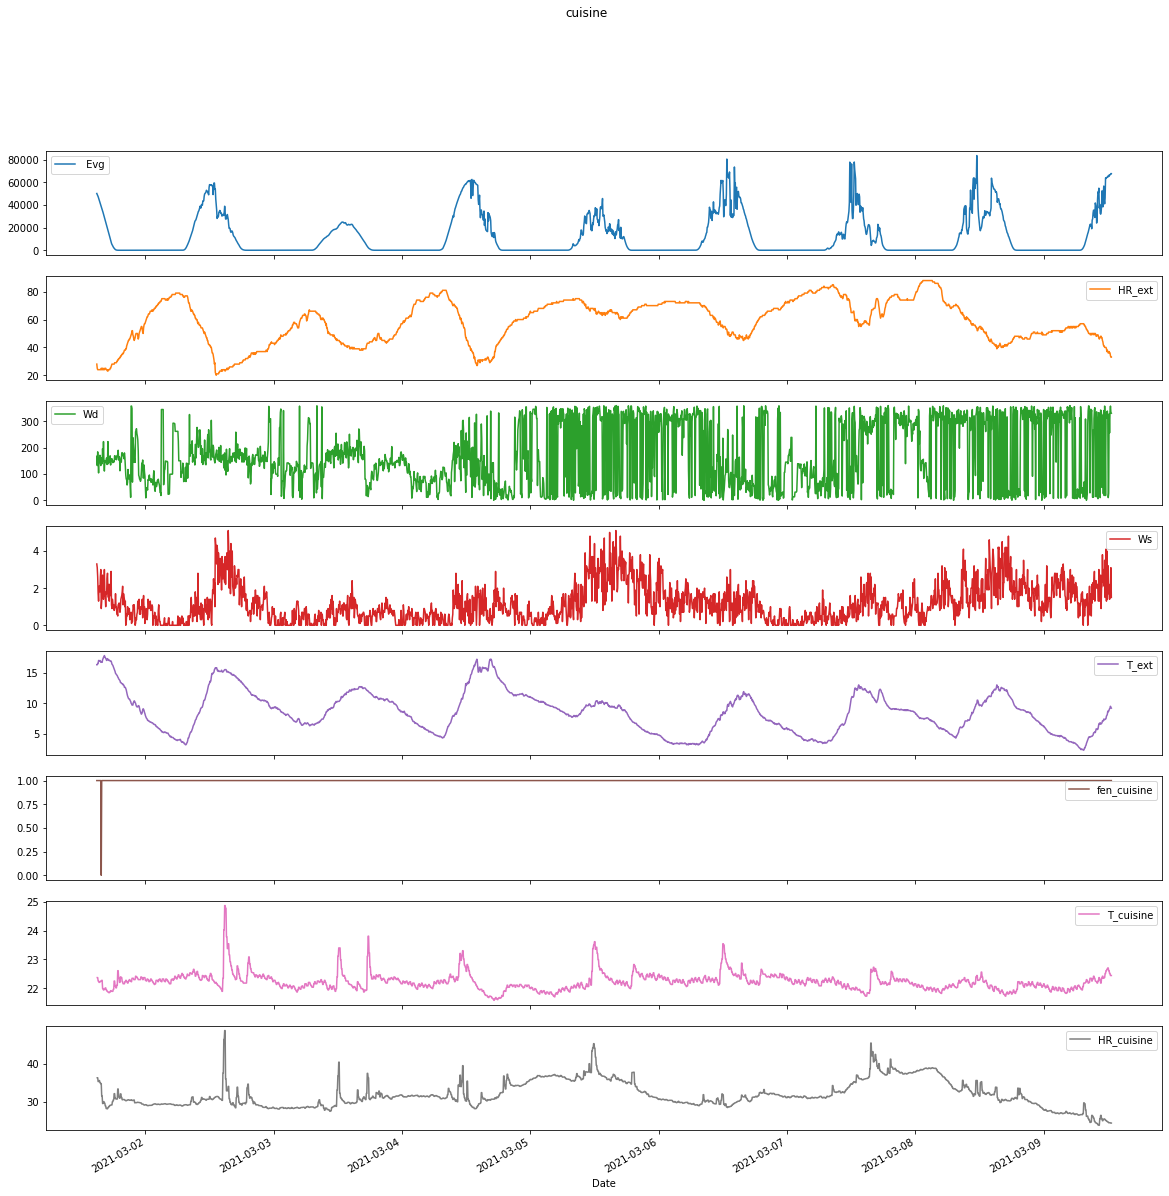

In [24]:
dfc.plot(x='Date',x_compat=True,subplots=True,figsize=(20,20),title='cuisine')

In [25]:
dfs.plot(x='Date',x_compat=True,subplots=True,figsize=(20,20),title='Salon')

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

(<AxesSubplot:title={'center':'AqueducR1'}, ylabel='fen_chambre 1'>,
 1    0.898095
 0    0.101905
 Name: fen_chambre 1, dtype: float64)

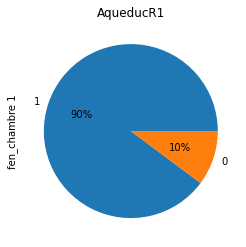

In [26]:
df1['fen_chambre 1'].value_counts().plot.pie(autopct='%1.0f%%',title='AqueducR1'),df1['fen_chambre 1'].value_counts(normalize=True)

In [27]:
df2['fen_chambre 2'].value_counts().plot.pie(autopct='%1.0f%%',title='AqueducR1'),df2['fen_chambre 2'].value_counts(normalize=True)

(<AxesSubplot:title={'center':'AqueducR1'}, ylabel='fen_chambre 2'>,
 1    0.967199
 0    0.032801
 Name: fen_chambre 2, dtype: float64)

(<AxesSubplot:title={'center':'AqueducR1'}, ylabel='fen_cuisine'>,
 1    0.999561
 0    0.000439
 Name: fen_cuisine, dtype: float64)

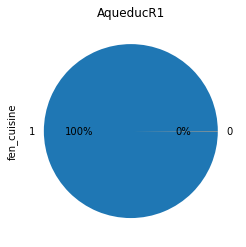

In [28]:
dfc['fen_cuisine'].value_counts().plot.pie(autopct='%1.0f%%',title='AqueducR1'),dfc['fen_cuisine'].value_counts(normalize=True)

(<AxesSubplot:title={'center':'AqueducR1'}, ylabel='fen_salon'>,
 1    0.980914
 0    0.019086
 Name: fen_salon, dtype: float64)

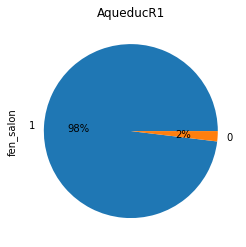

In [29]:
dfs['fen_salon'].value_counts().plot.pie(autopct='%1.0f%%',title='AqueducR1'),dfs['fen_salon'].value_counts(normalize=True)

# Création de sous-ensembles fenetre ouverte et fermée Pour voir quelle données impact l'ouverture des fenetre

In [30]:
f1_df = df1[df1['fen_chambre 1']==1]
f2_df = df2[df2['fen_chambre 2']==1]
fc_df = dfc[dfc['fen_cuisine']==1]
fs_df = dfs[dfs['fen_salon']==1]

In [31]:
o1_df = df1[df1['fen_chambre 1']==0]
o2_df = df2[df2['fen_chambre 2']==0]
oc_df = dfc[dfc['fen_cuisine']==0]
os_df = dfs[dfs['fen_salon']==0]

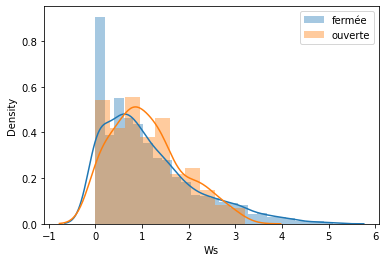

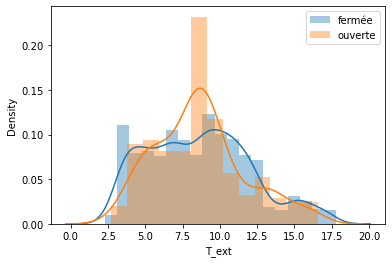

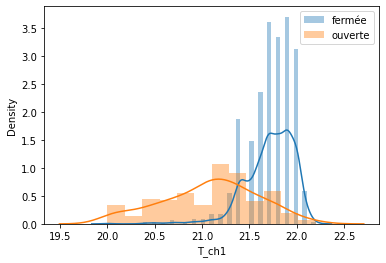

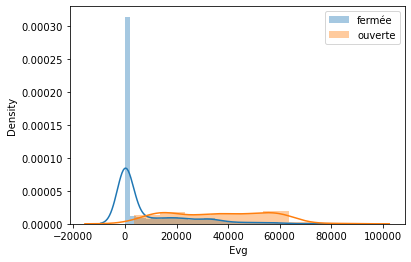

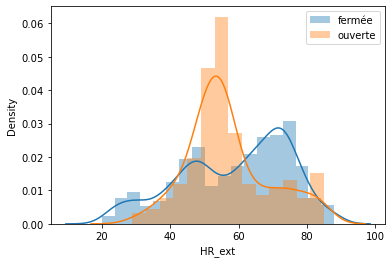

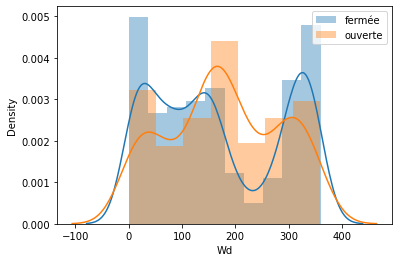

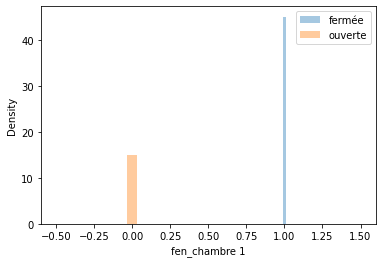

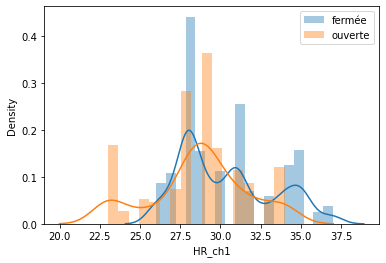

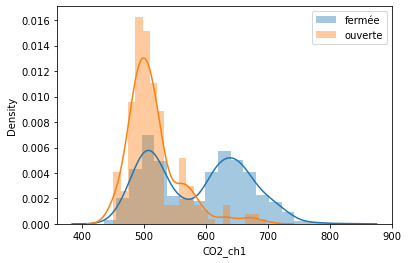

In [32]:
for col in df1.select_dtypes('float'):
    plt.figure()
    sns.distplot(f1_df[col],label='fermée')
    sns.distplot(o1_df[col],label='ouverte')
    plt.legend()
for col in df1.select_dtypes('int'):
    plt.figure()
    sns.distplot(f1_df[col],label='fermée')
    sns.distplot(o1_df[col],label='ouverte')
    plt.legend()

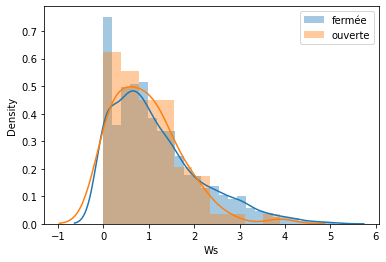

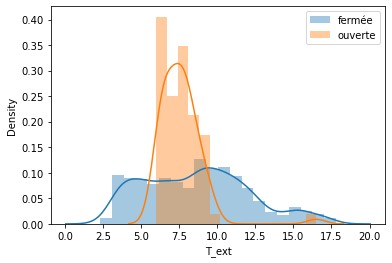

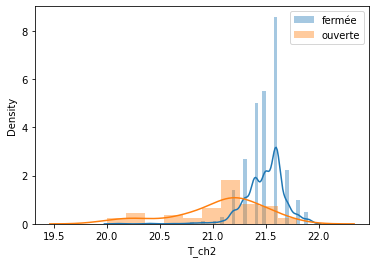

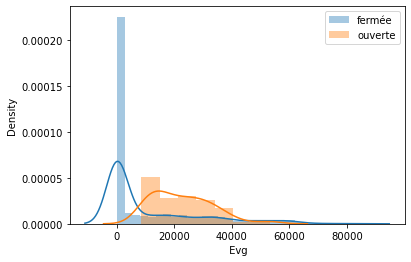

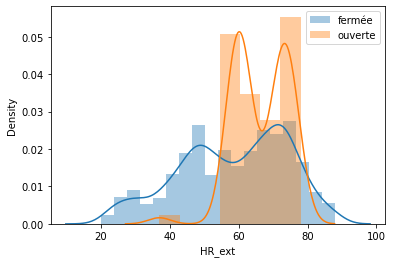

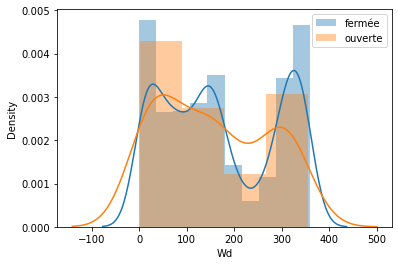

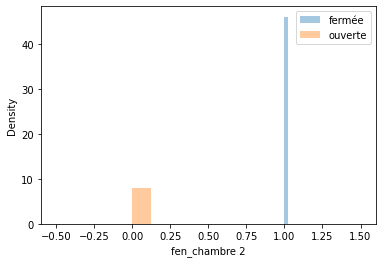

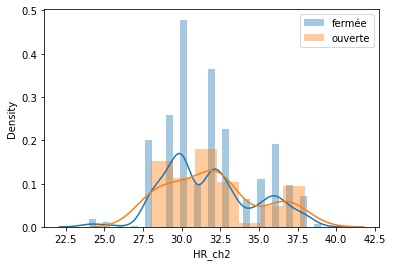

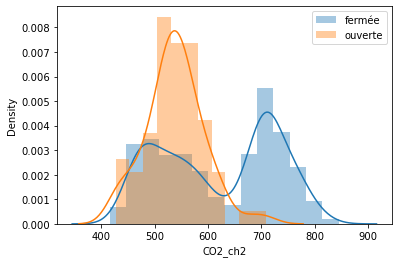

In [33]:
for col in df2.select_dtypes('float'):
    plt.figure()
    sns.distplot(f2_df[col],label='fermée')
    sns.distplot(o2_df[col],label='ouverte')
    plt.legend()
for col in df2.select_dtypes('int'):
    plt.figure()
    sns.distplot(f2_df[col],label='fermée')
    sns.distplot(o2_df[col],label='ouverte')
    plt.legend()

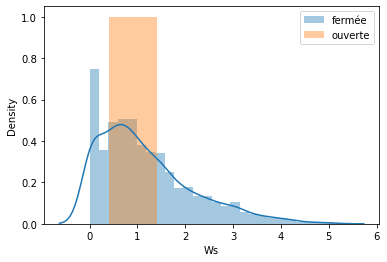

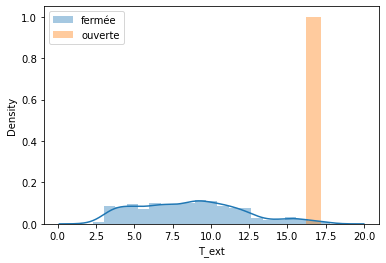

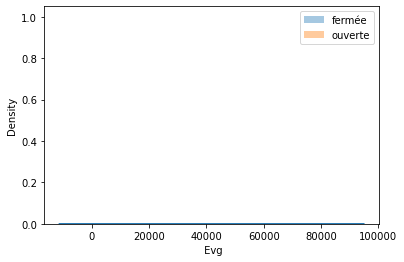

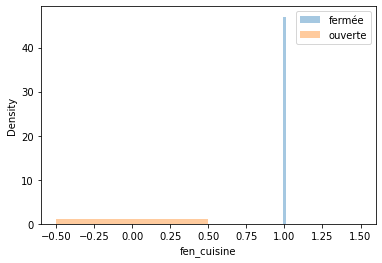

In [34]:
for col in dfc.select_dtypes('float'):
    plt.figure()
    sns.distplot(fc_df[col],label='fermée')
    sns.distplot(oc_df[col],label='ouverte')
    plt.legend()
for col in dfc.select_dtypes('int'):
    plt.figure()
    sns.distplot(fc_df[col],label='fermée')
    sns.distplot(oc_df[col],label='ouverte')
    plt.legend()

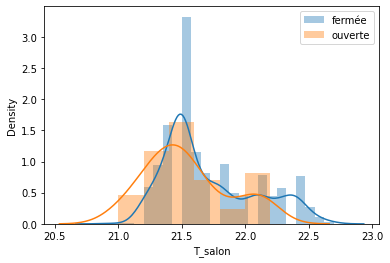

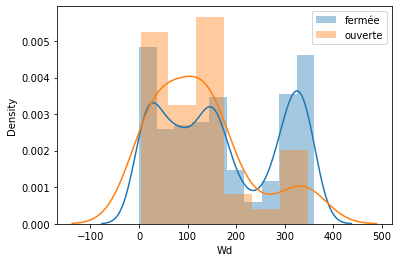

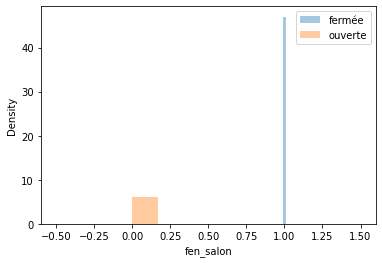

In [35]:
for col in dfs.select_dtypes('float'):
    plt.figure()
    sns.distplot(fs_df[col],label='fermée')
    sns.distplot(os_df[col],label='ouverte')
    plt.legend()
for col in dfs.select_dtypes('int'):
    plt.figure()
    sns.distplot(fs_df[col],label='fermée')
    sns.distplot(os_df[col],label='ouverte')
    plt.legend()

In [30]:
plt.subplots(figsize=(8,8))
sns.heatmap(df1.corr(), annot=True, square=True, cbar=True)#center=0
plt.title('AqueducR1_ch1')
plt.show()
import scipy
from scipy import stats
corr_df1=pd.DataFrame(columns=['corrélation','p_value'])
for col in df1:
    if pd.api.types.is_numeric_dtype(df1[col]) and col != 'fen_chambre 1' and col !='Date':
        corrélation, p_value = stats.pearsonr(df1['fen_chambre 1'],df1[col])
        corr_df1.loc[col]=[corrélation,p_value]
corr_df1

corrélation        p_value
 Evg       -0.491973  6.846227e-138
HR_ext      0.042110   4.546236e-02
Wd         -0.022431   2.867886e-01
Ws          0.014500   4.911320e-01
T_ext       0.000965   9.634452e-01
T_ch1       0.550788  2.956199e-179
HR_ch1      0.169217   5.815972e-16
CO2_ch1     0.275796   1.106487e-40

In [34]:
plt.subplots(figsize=(8,8))
sns.heatmap(df2.corr(), annot=True, square=True, cbar=True)#center=0
plt.title('AqueducR1_ch2')
plt.show()
import scipy
from scipy import stats
corr_df2=pd.DataFrame(columns=['corrélation','p_value'])
for col in df2:
    if pd.api.types.is_numeric_dtype(df2[col]) and col != 'fen_chambre 2' and col !='Date':
        corrélation, p_value = stats.pearsonr(df2['fen_chambre 2'],df2[col])
        corr_df2.loc[col]=[corrélation,p_value]
corr_df2

corrélation       p_value
 Evg       -0.123255  4.268590e-09
HR_ext     -0.089833  1.927720e-05
Wd          0.022859  2.777992e-01
Ws          0.038298  6.895666e-02
T_ext       0.054630  9.450802e-03
T_ch2       0.355260  4.361022e-68
HR_ch2     -0.013823  5.116866e-01
CO2_ch2     0.135141  1.156835e-10

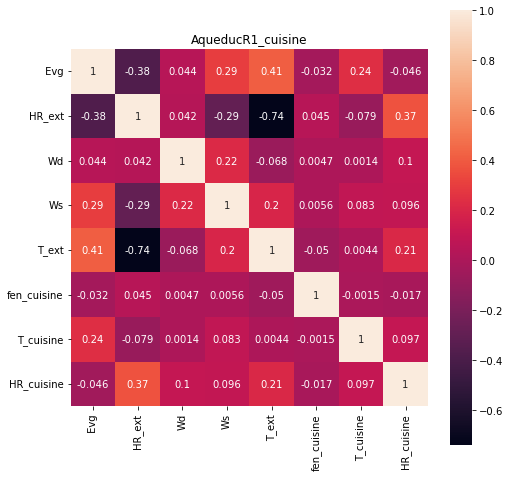

corrélation   p_value
 Evg          -0.032306  0.123289
HR_ext         0.044871  0.032270
Wd             0.004681  0.823339
Ws             0.005555  0.791046
T_ext         -0.049828  0.017414
T_cuisine     -0.001487  0.943469
HR_cuisine    -0.017082  0.415219

In [45]:
#======================== heatmap corrélation ===========================#
plt.subplots(figsize=(8,8))
sns.heatmap(dfc.corr(), annot=True, square=True, cbar=True)#center=0
plt.title('AqueducR1_cuisine')
plt.show()
#=============== corrélation avec p-value ============================#
#il faut enlever les valeurs maquantes 
dfc.dropna(axis = 0, how = 'any',inplace=True)
corr_dfc=pd.DataFrame(columns=['corrélation','p_value'])
for col in dfc:
    if pd.api.types.is_numeric_dtype(dfc[col]) and col != 'fen_cuisine' and col !='Date':
        corrélation, p_value = stats.pearsonr(dfc['fen_cuisine'],dfc[col])
        corr_dfc.loc[col]=[corrélation,p_value]
corr_dfc

Date    Evg  HR_ext   Wd   Ws  T_ext  fen_chambre 1  \
0    2021-03-01 14:40:00  52330      37  140  2.5   16.5              1   
1    2021-03-01 14:45:00  51880      36  157  0.9   16.7              1   
2    2021-03-01 14:50:00  51390      33  165  1.4   16.4              1   
3    2021-03-01 14:55:00  50110      28  167  3.3   16.3              1   
4    2021-03-01 15:00:00  49200      25  132  3.1   16.3              1   
...                  ...    ...     ...  ...  ...    ...            ...   
2252 2021-03-09 10:20:00  54800      47  333  3.0    6.6              0   
2253 2021-03-09 10:25:00  37240      46  295  2.6    6.7              0   
2254 2021-03-09 10:30:00  40450      47  321  1.3    6.6              0   
2255 2021-03-09 10:35:00  32670      47   10  2.5    6.8              0   
2256 2021-03-09 10:40:00  31850      48  343  2.7    6.6              0   

      T_ch1  HR_ch1  CO2_ch1  
0      21.7      35      664  
1      21.7      35      664  
2      21.6      35      669  
3      21.6      35      669  
4      21.6      34      621  
...     ...     ...      ...  
2252   21.1      23      459  
2253   21.1      23      459  
2254   21.1      23      457  
2255   21.1      23      457  
2256   21.1      23      457  

[2257 rows x 10 columns]

In [43]:
dfs.dropna(axis = 0, how = 'any',inplace=True)
plt.subplots(figsize=(8,8))
sns.heatmap(dfs.corr(), annot=True, square=True, cbar=True)#center=0
plt.title('AqueducR1_salon')
plt.show()
corr_dfs=pd.DataFrame(columns=['corrélation','p_value'])
for col in dfs:
    if pd.api.types.is_numeric_dtype(dfs[col]) and col != 'fen_salon' and col !='Date':
        corrélation, p_value = stats.pearsonr(dfs['fen_salon'],dfs[col])
        corr_dfs.loc[col]=[corrélation,p_value]
corr_dfs

corrélation       p_value
 Evg         -0.222642  1.083761e-26
HR_ext        0.166157  2.090050e-15
Wd            0.053919  1.049221e-02
Ws           -0.097806  3.319764e-06
T_ext        -0.200641  6.972869e-22
T_salon       0.064647  2.145111e-03
HR_salon      0.042495  4.375563e-02
CO2_salon     0.158814  3.442064e-14

Date    Evg  HR_ext   Wd   Ws  T_ext  fen_salon  T_salon  \
1    2021-03-01 15:00:00  49200      25  132  3.1   16.3          1     21.7   
2    2021-03-01 15:05:00  48120      24  184  2.6   16.5          1     21.7   
3    2021-03-01 15:10:00  47320      24  147  1.7   16.5          1     21.8   
4    2021-03-01 15:15:00  45950      24  104  1.3   17.0          1     21.8   
5    2021-03-01 15:20:00  44830      24  159  2.1   16.9          1     21.9   
...                  ...    ...     ...  ...  ...    ...        ...      ...   
2248 2021-03-09 10:15:00  50550      48  296  1.3    6.2          1     21.2   
2249 2021-03-09 10:20:00  54800      47  333  3.0    6.6          1     21.3   
2250 2021-03-09 10:25:00  37240      46  295  2.6    6.7          1     21.3   
2251 2021-03-09 10:30:00  40450      47  321  1.3    6.6          1     21.3   
2252 2021-03-09 10:35:00  32670      47   10  2.5    6.8          1     21.3   

      HR_salon  CO2_salon  
1         36.0      824.0  
2         36.0      824.0  
3         37.0      989.0  
4         37.0      989.0  
5         37.0     1066.0  
...        ...        ...  
2248      25.0      523.0  
2249      25.0      516.0  
2250      25.0      516.0  
2251      25.0      516.0  
2252      25.0      516.0  

[2252 rows x 10 columns]

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

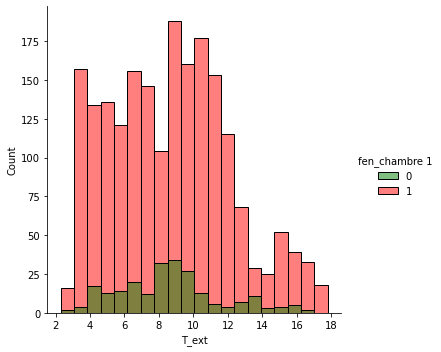

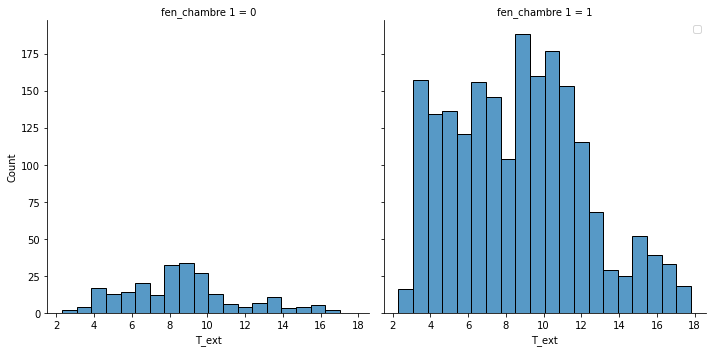

<Figure size 432x288 with 0 Axes>

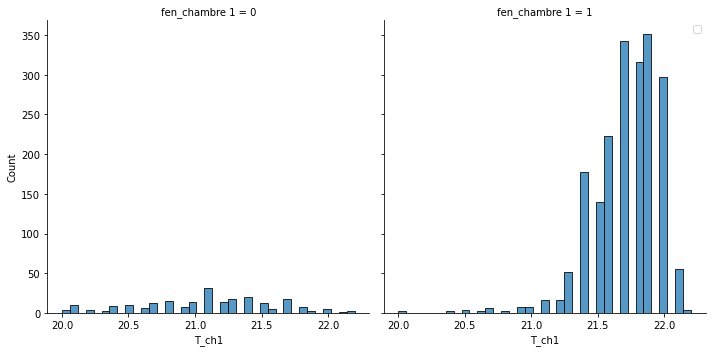

<Figure size 432x288 with 0 Axes>

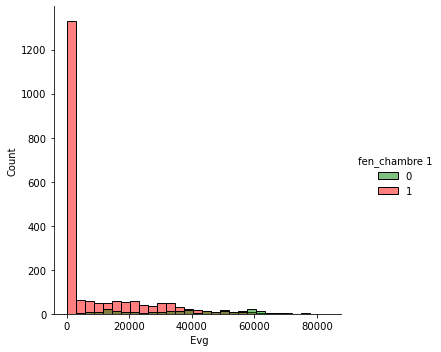

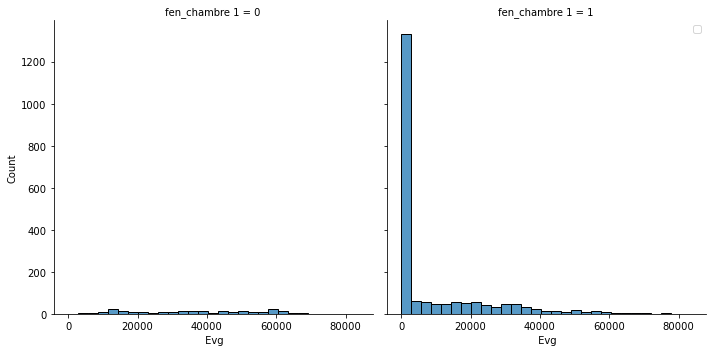

<Figure size 432x288 with 0 Axes>

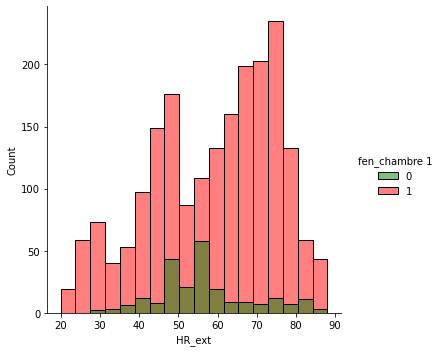

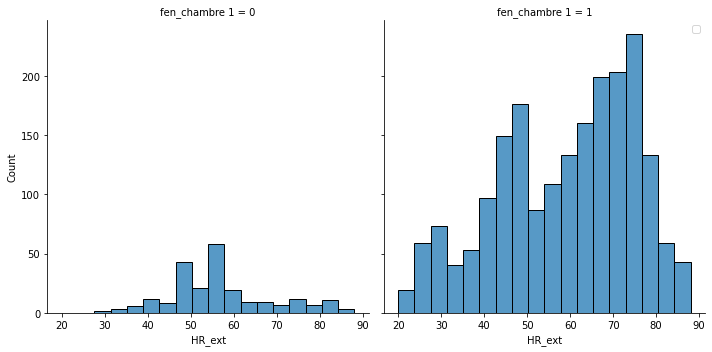

<Figure size 432x288 with 0 Axes>

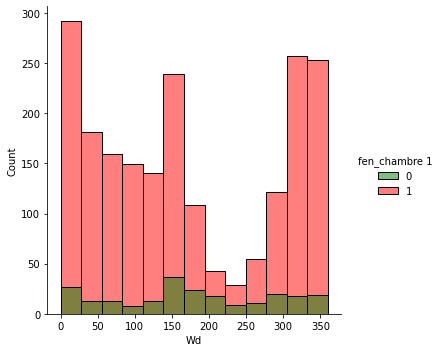

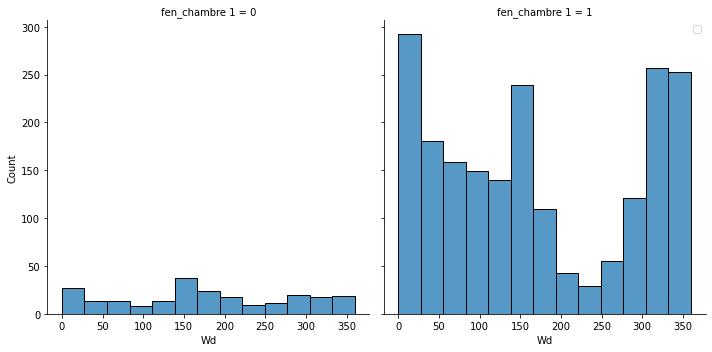

<Figure size 432x288 with 0 Axes>

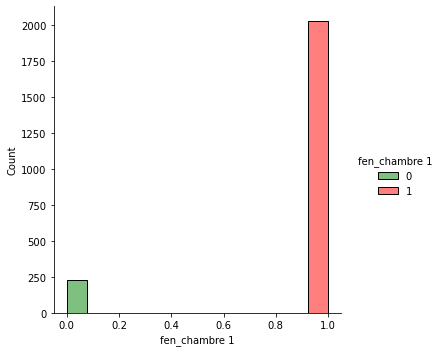

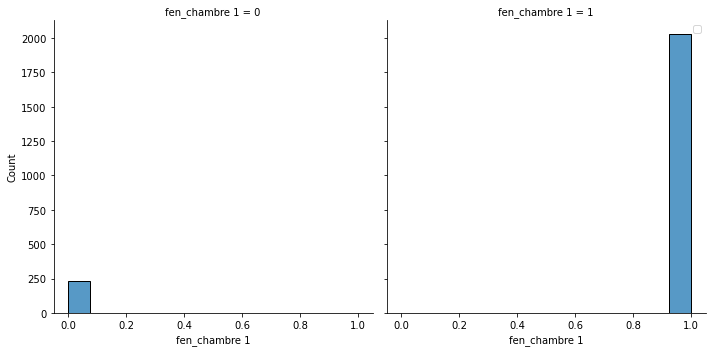

<Figure size 432x288 with 0 Axes>

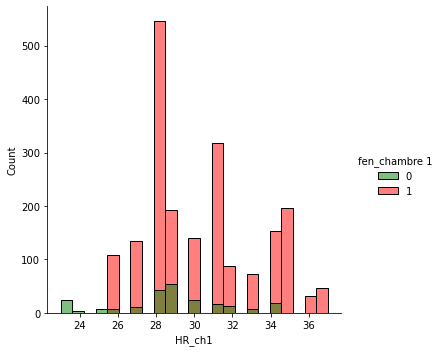

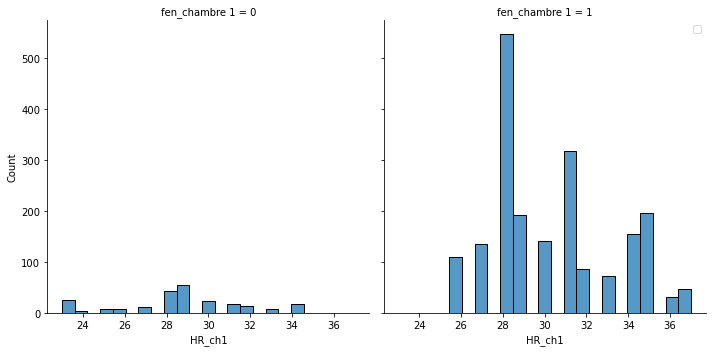

<Figure size 432x288 with 0 Axes>

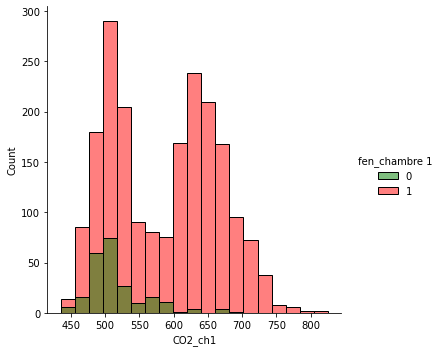

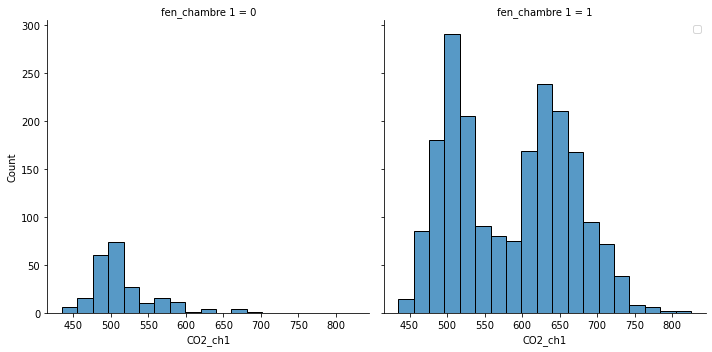

In [40]:
for col in df1.select_dtypes('float'):
    plt.figure()
    sns.displot(data=df1,x=col,hue="fen_chambre 1",palette=["g","r"])
    sns.displot(data=df1,x=col,col="fen_chambre 1",palette=["g","r"])
    plt.legend()
for col in df1.select_dtypes('int'):
    plt.figure()
    sns.displot(data=df1,x=col,hue="fen_chambre 1",palette=["g","r"])
    sns.displot(data=df1,x=col,col="fen_chambre 1",palette=["g","r"])
    plt.legend()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

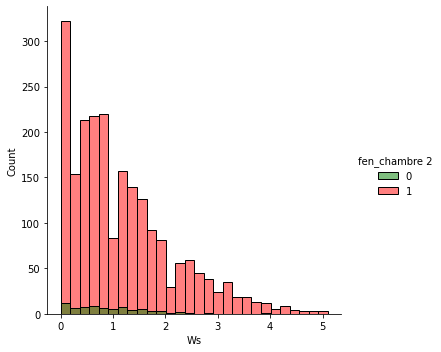

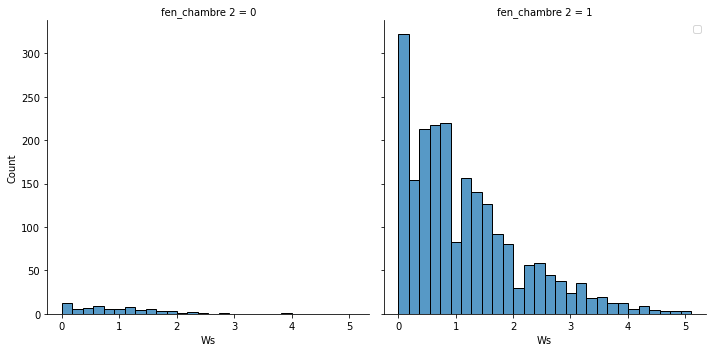

<Figure size 432x288 with 0 Axes>

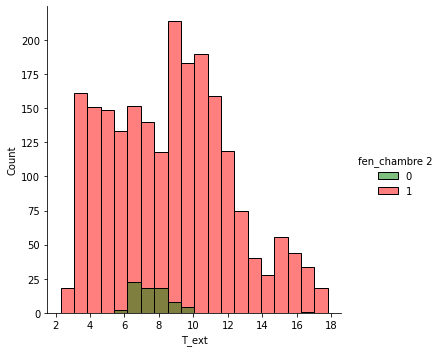

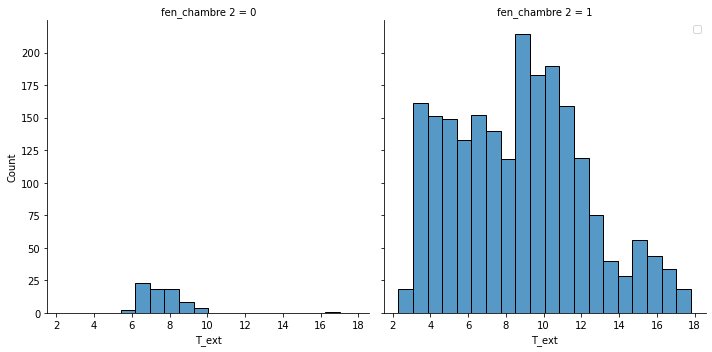

<Figure size 432x288 with 0 Axes>

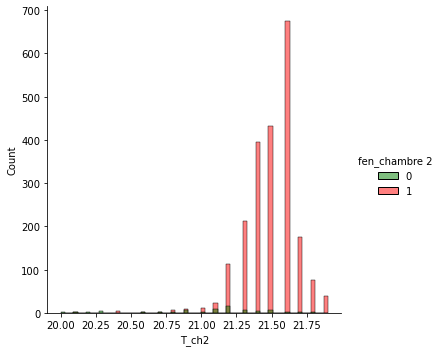

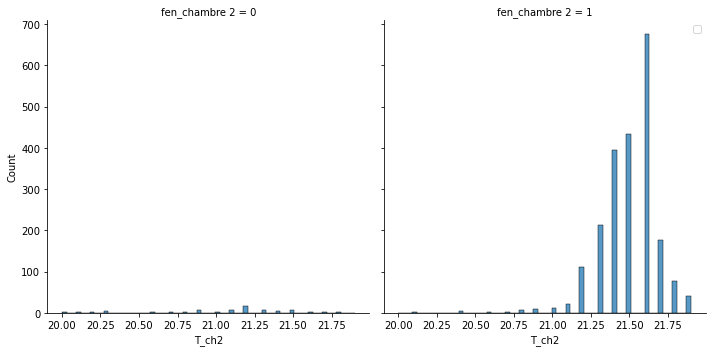

<Figure size 432x288 with 0 Axes>

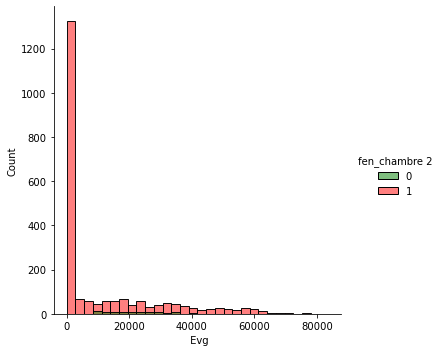

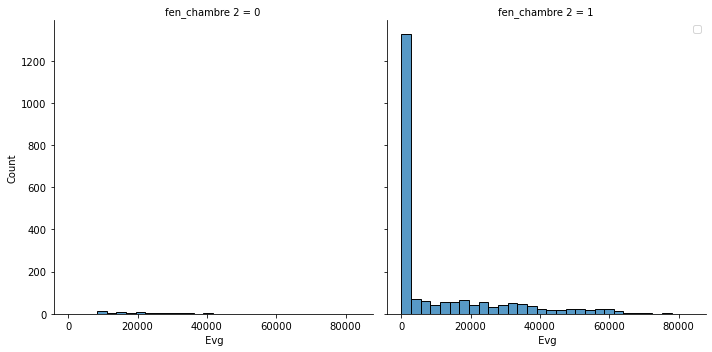

<Figure size 432x288 with 0 Axes>

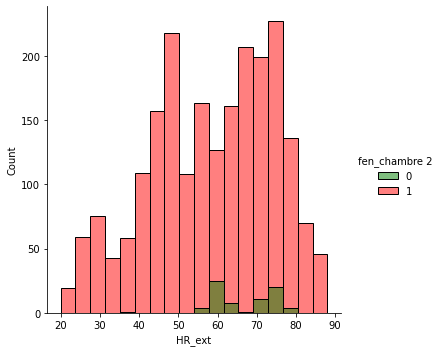

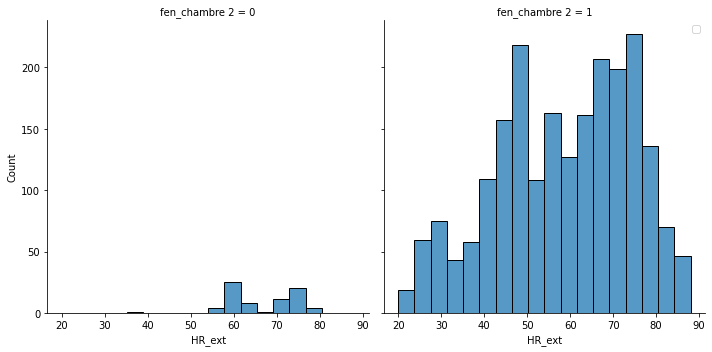

<Figure size 432x288 with 0 Axes>

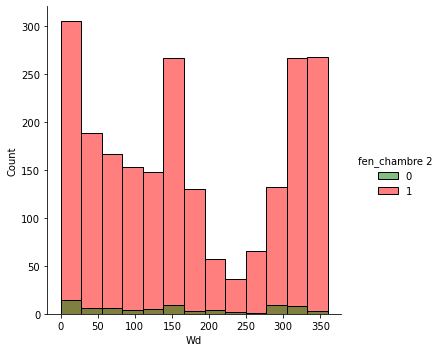

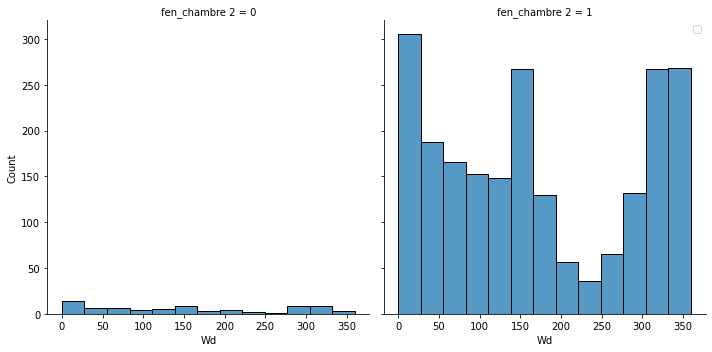

<Figure size 432x288 with 0 Axes>

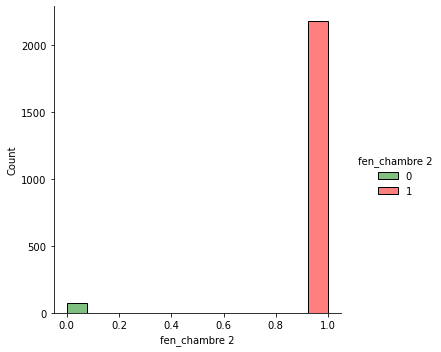

<Figure size 432x288 with 0 Axes>

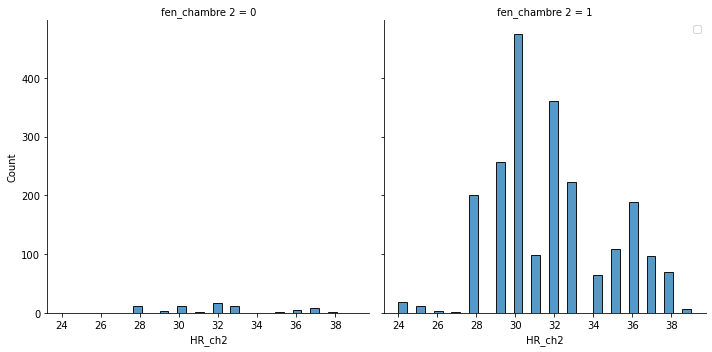

<Figure size 432x288 with 0 Axes>

In [41]:
for col in df2.select_dtypes('float'):
    plt.figure()
    sns.displot(data=df2,x=col,hue="fen_chambre 2",palette=["g","r"])
    sns.displot(data=df2,x=col,col="fen_chambre 2",palette=["g","r"])
    plt.legend()
for col in df2.select_dtypes('int'):
    plt.figure()
    sns.displot(data=df2,x=col,hue="fen_chambre 2",palette=["g","r"])
    sns.displot(data=df2,x=col,col="fen_chambre 2",palette=["g","r"])
    plt.legend()    

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

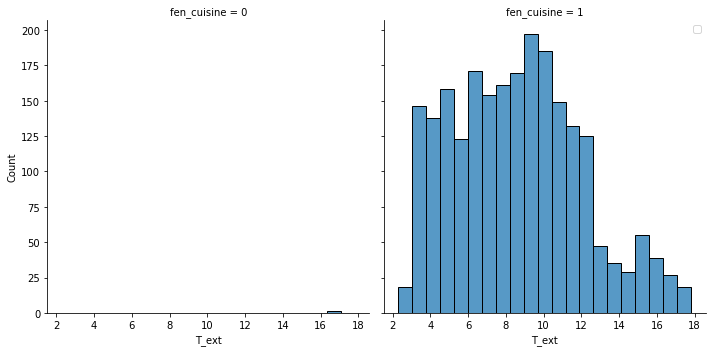

<Figure size 432x288 with 0 Axes>

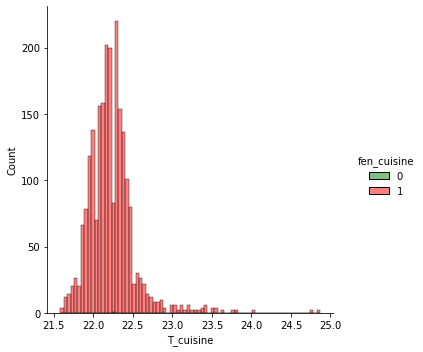

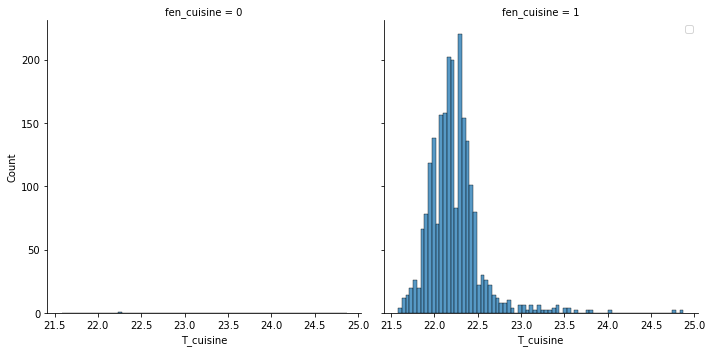

<Figure size 432x288 with 0 Axes>

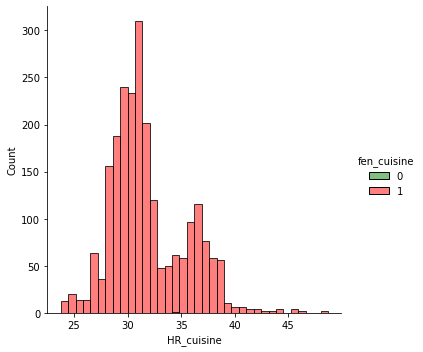

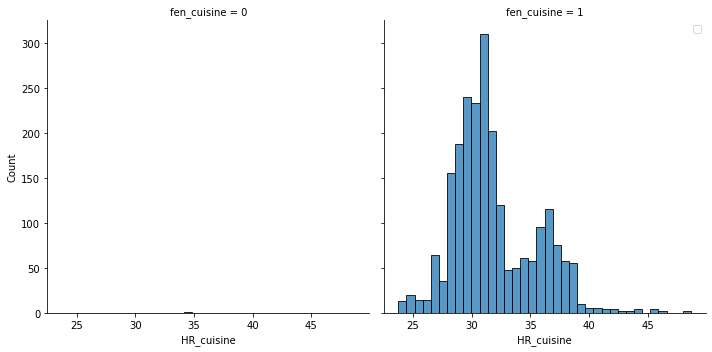

<Figure size 432x288 with 0 Axes>

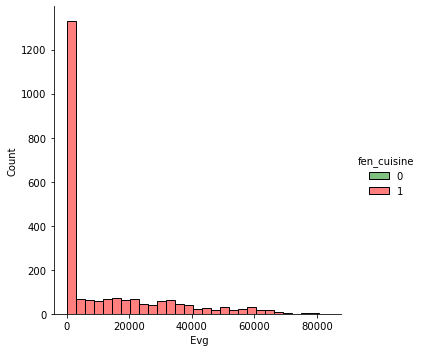

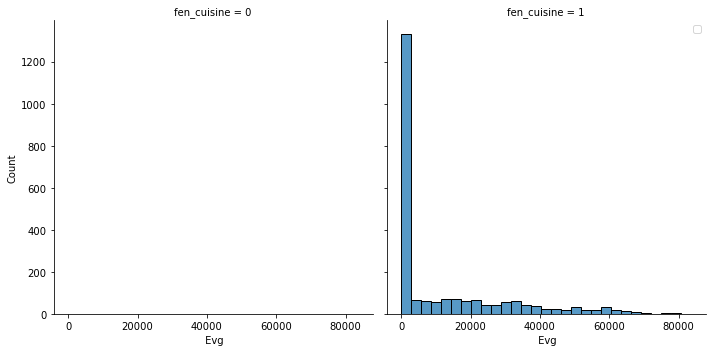

<Figure size 432x288 with 0 Axes>

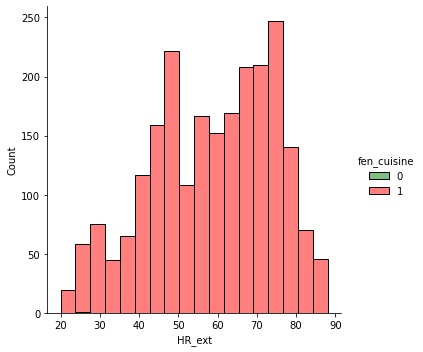

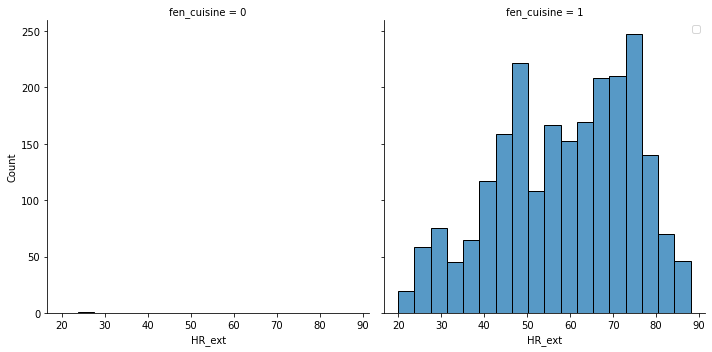

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

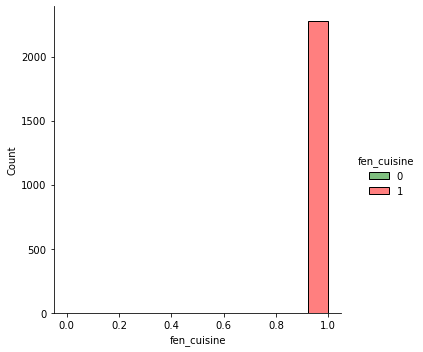

In [42]:
for col in dfc.select_dtypes('float'):
    plt.figure()
    sns.displot(data=dfc,x=col,hue="fen_cuisine",palette=["g","r"])
    sns.displot(data=dfc,x=col,col="fen_cuisine",palette=["g","r"])
    plt.legend()
for col in dfc.select_dtypes('int'):
    plt.figure()
    sns.displot(data=dfc,x=col,hue="fen_cuisine",palette=["g","r"])
    sns.displot(data=dfc,x=col,col="fen_cuisine",palette=["g","r"])
    plt.legend()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

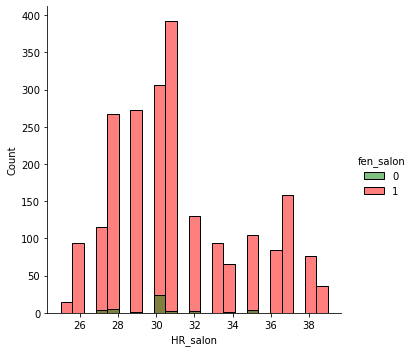

<Figure size 432x288 with 0 Axes>

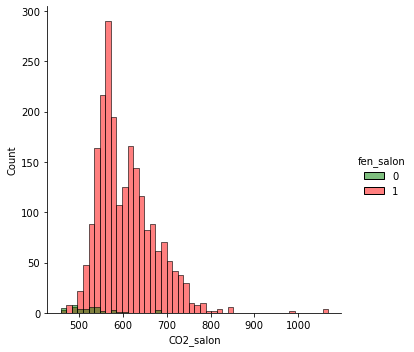

<Figure size 432x288 with 0 Axes>

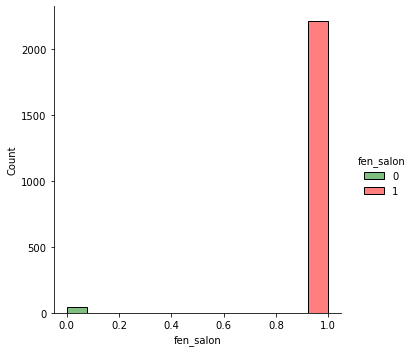

In [31]:
for col in dfs.select_dtypes('float'):
    plt.figure()
    sns.displot(data=dfs,x=col,hue="fen_salon",palette=["g","r"])
    sns.displot(data=dfs,x=col,col="fen_salon",palette=["g","r"])
    plt.legend()
for col in dfs.select_dtypes('int'):
    plt.figure()
    sns.displot(data=dfs,x=col,hue="fen_salon",palette=["g","r"])
    sns.displot(data=dfs,x=col,col="fen_salon",palette=["g","r"])
    plt.legend()    
    

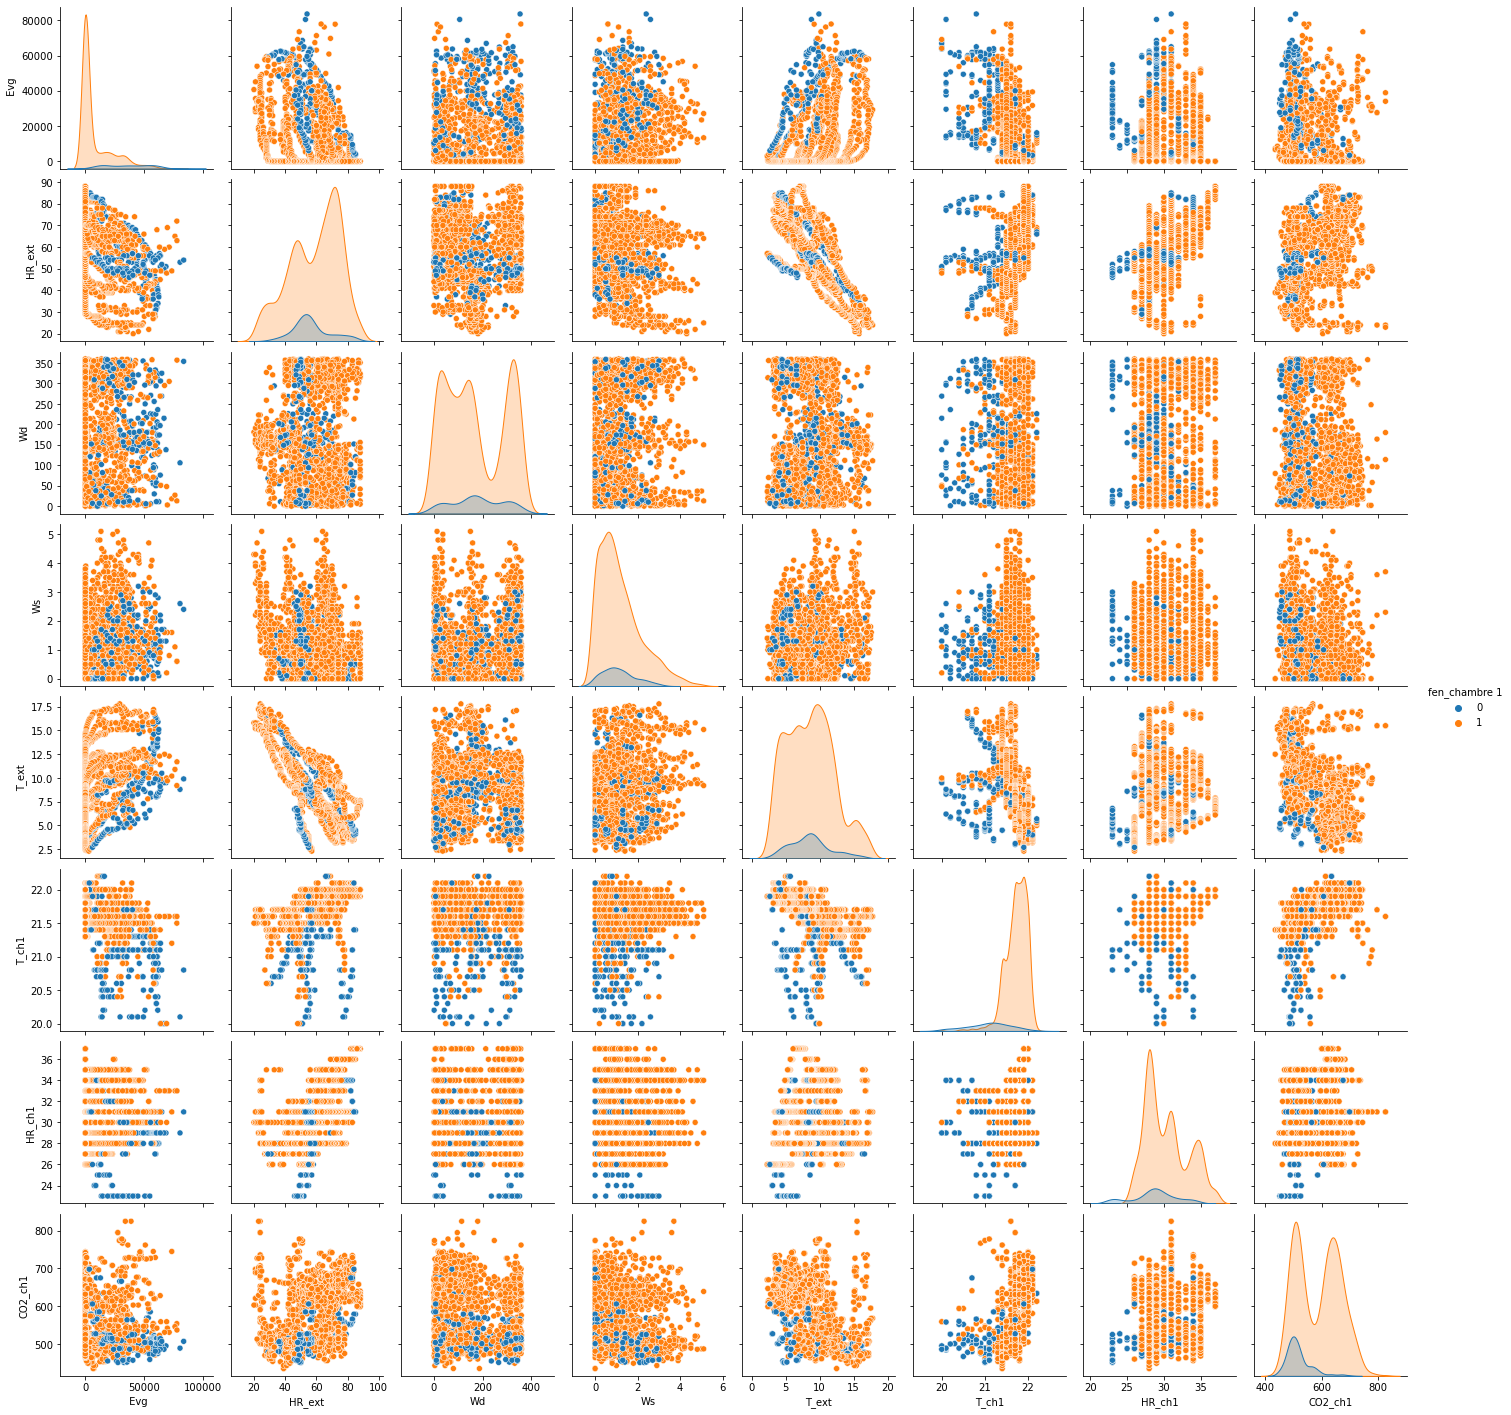

In [43]:
#sns.set_theme(style="ticks")
#CHAMBRE 1 
sns.pairplot(df1, hue="fen_chambre 1")

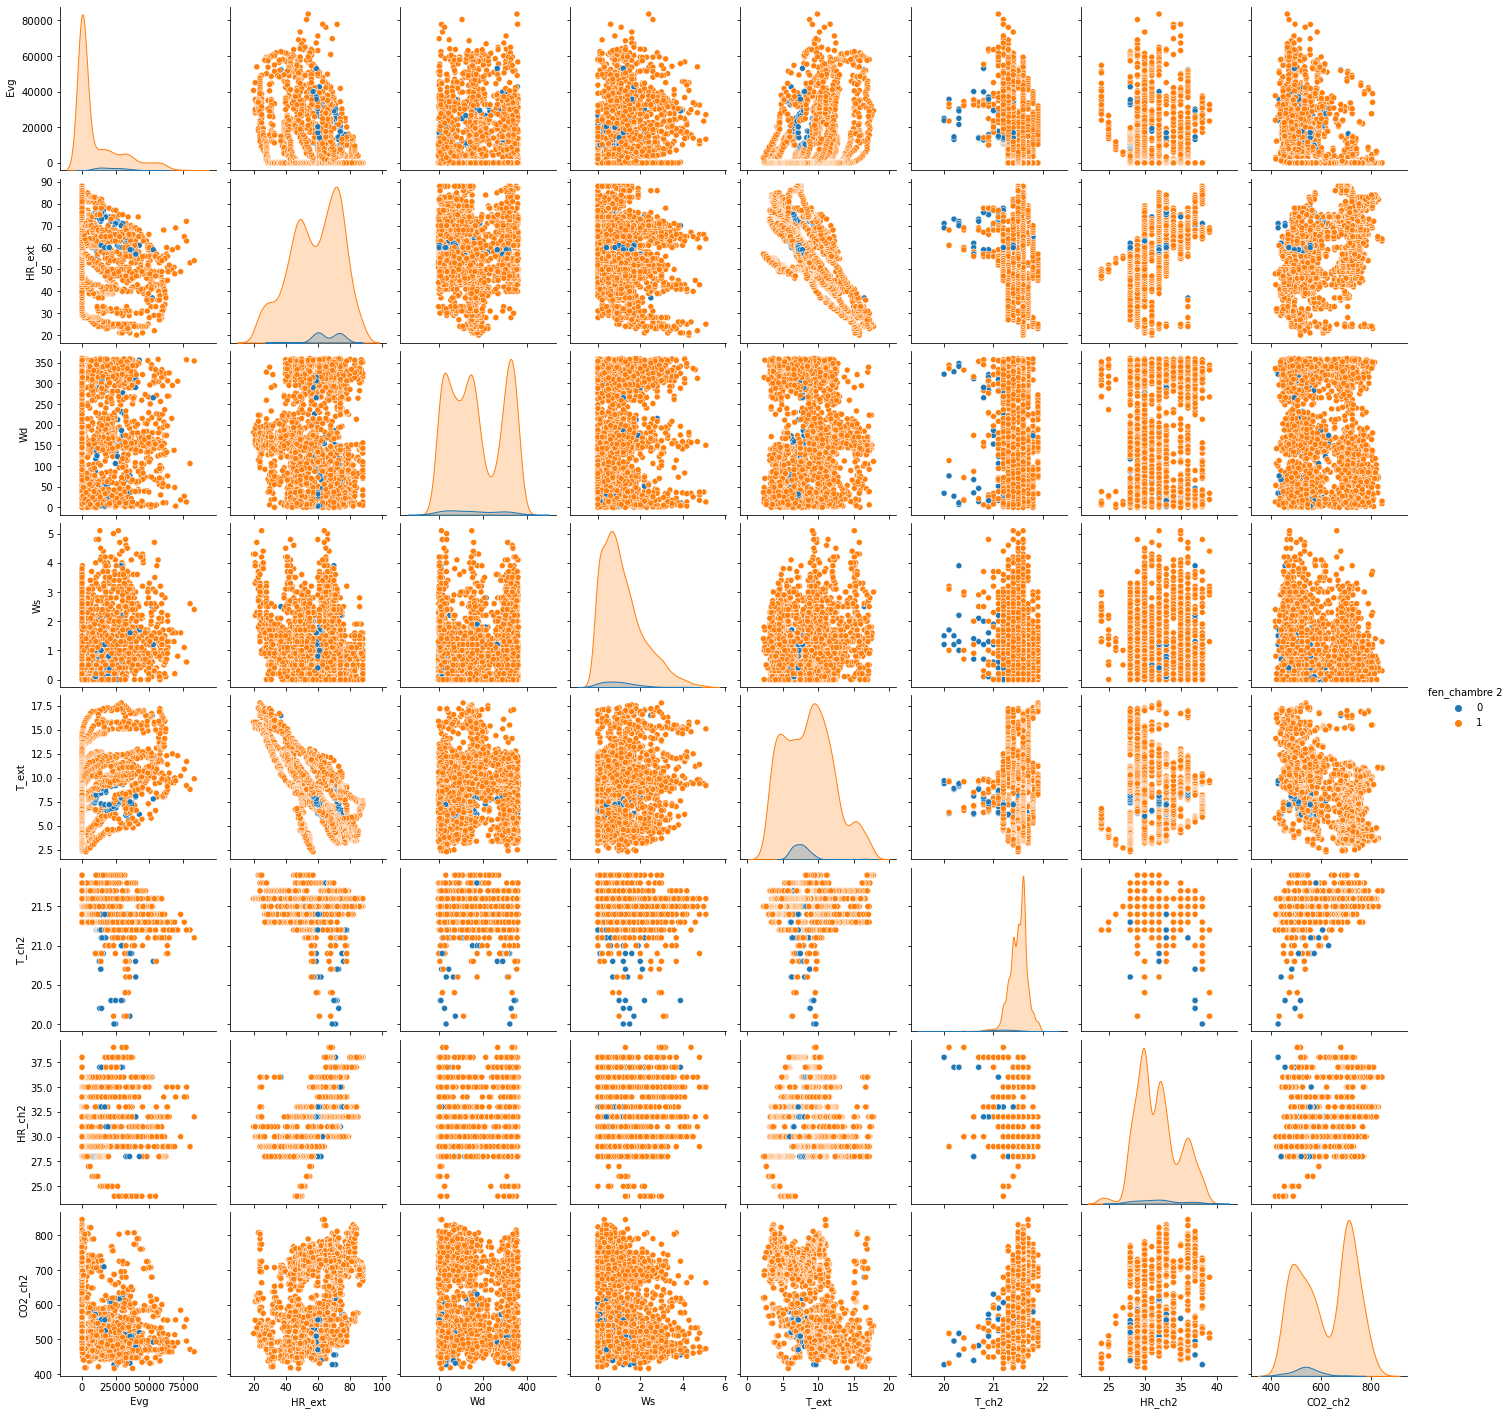

In [44]:
#CHAMBRE 2
sns.pairplot(df2, hue="fen_chambre 2")

In [45]:
#CUISINE
sns.pairplot(dfc, hue="fen_cuisine")

In [46]:
#SALON
sns.pairplot(dfs, hue="fen_salon")

In [16]:
import dtale 
df

fen_ch1  T_ch1  HR_ch1  CO2_ch1  fen_ch2  T_ch2  HR_ch2  \
Date                                                                           
2021-03-01 15:00:00      1.0   21.6    34.0    621.0      1.0   21.6    36.0   
2021-03-01 15:05:00      1.0   21.6    34.0    621.0      1.0   21.6    36.0   
2021-03-01 15:10:00      1.0   21.7    34.0    736.0      1.0   21.7    36.0   
2021-03-01 15:15:00      1.0   21.7    34.0    736.0      1.0   21.7    36.0   
2021-03-01 15:20:00      1.0   21.7    34.0    677.0      1.0   21.7    36.0   
...                      ...    ...     ...      ...      ...    ...     ...   
2021-03-09 10:15:00      0.0   21.1    23.0    504.0      1.0   21.2    24.0   
2021-03-09 10:20:00      0.0   21.1    23.0    459.0      1.0   21.2    24.0   
2021-03-09 10:25:00      0.0   21.1    23.0    459.0      1.0   21.2    24.0   
2021-03-09 10:30:00      0.0   21.1    23.0    457.0      1.0   21.2    24.0   
2021-03-09 10:35:00      0.0   21.1    23.0    457.0      1.0   21.2    24.0   

                     CO2_ch2  fen_cuisine  T_cuisine  HR_cuisine  fen_salon  \
Date                                                                          
2021-03-01 15:00:00    724.0          1.0     22.369      36.267        1.0   
2021-03-01 15:05:00    724.0          1.0     22.369      36.267        1.0   
2021-03-01 15:10:00    704.0          1.0     22.250      35.265        1.0   
2021-03-01 15:15:00    704.0          1.0     22.250      35.265        1.0   
2021-03-01 15:20:00    760.0          1.0     22.202      35.525        1.0   
...                      ...          ...        ...         ...        ...   
2021-03-09 10:15:00    431.0          1.0     22.250      23.842        1.0   
2021-03-09 10:20:00    447.0          1.0     22.369      23.748        1.0   
2021-03-09 10:25:00    447.0          1.0     22.369      23.748        1.0   
2021-03-09 10:30:00    447.0          1.0     22.298      25.447        1.0   
2021-03-09 10:35:00    447.0          1.0     22.298      25.447        1.0   

                     T_salon  HR_salon  CO2_salon  
Date                                               
2021-03-01 15:00:00     21.7      36.0      824.0  
2021-03-01 15:05:00     21.7      36.0      824.0  
2021-03-01 15:10:00     21.8      37.0      989.0  
2021-03-01 15:15:00     21.8      37.0      989.0  
2021-03-01 15:20:00     21.9      37.0     1066.0  
...                      ...       ...        ...  
2021-03-09 10:15:00     21.2      25.0      523.0  
2021-03-09 10:20:00     21.3      25.0      516.0  
2021-03-09 10:25:00     21.3      25.0      516.0  
2021-03-09 10:30:00     21.3      25.0      516.0  
2021-03-09 10:35:00     21.3      25.0      516.0  

[2252 rows x 15 columns]

In [17]:
dfR1=dtale.show(df)
dfR1

Exception occurred while processing request: freq T not understood. Please report if you think this is in error.
Traceback (most recent call last):
  File "C:\Users\yazid.aissaoui\Anaconda3\lib\site-packages\dtale\views.py", line 122, in _handle_exceptions
    return func(*args, **kwargs)
  File "C:\Users\yazid.aissaoui\Anaconda3\lib\site-packages\dtale\views.py", line 3809, in get_timeseries_analysis
    data = ts_rpt.run()
  File "C:\Users\yazid.aissaoui\Anaconda3\lib\site-packages\dtale\timeseries_analysis.py", line 48, in run
    return self.report.run(data)
  File "C:\Users\yazid.aissaoui\Anaconda3\lib\site-packages\dtale\timeseries_analysis.py", line 110, in run
    sd_df = seasonal_decompose(df, model=model)
  File "C:\Users\yazid.aissaoui\Anaconda3\lib\site-packages\pandas\util\_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\yazid.aissaoui\Anaconda3\lib\site-packages\statsmodels\tsa\seasonal.py", line 140, in seasonal_decompose
    pfreq 

2022-05-16 14:00:57,181 - ERROR    - Exception occurred while processing request: freq T not understood. Please report if you think this is in error.
Traceback (most recent call last):
  File "C:\Users\yazid.aissaoui\Anaconda3\lib\site-packages\dtale\views.py", line 122, in _handle_exceptions
    return func(*args, **kwargs)
  File "C:\Users\yazid.aissaoui\Anaconda3\lib\site-packages\dtale\views.py", line 3809, in get_timeseries_analysis
    data = ts_rpt.run()
  File "C:\Users\yazid.aissaoui\Anaconda3\lib\site-packages\dtale\timeseries_analysis.py", line 48, in run
    return self.report.run(data)
  File "C:\Users\yazid.aissaoui\Anaconda3\lib\site-packages\dtale\timeseries_analysis.py", line 110, in run
    sd_df = seasonal_decompose(df, model=model)
  File "C:\Users\yazid.aissaoui\Anaconda3\lib\site-packages\pandas\util\_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\yazid.aissaoui\Anaconda3\lib\site-packages\statsmodels\tsa\seasonal.py", line 

Exception occurred while processing request: freq T not understood. Please report if you think this is in error.
Traceback (most recent call last):
  File "C:\Users\yazid.aissaoui\Anaconda3\lib\site-packages\dtale\views.py", line 122, in _handle_exceptions
    return func(*args, **kwargs)
  File "C:\Users\yazid.aissaoui\Anaconda3\lib\site-packages\dtale\views.py", line 3809, in get_timeseries_analysis
    data = ts_rpt.run()
  File "C:\Users\yazid.aissaoui\Anaconda3\lib\site-packages\dtale\timeseries_analysis.py", line 48, in run
    return self.report.run(data)
  File "C:\Users\yazid.aissaoui\Anaconda3\lib\site-packages\dtale\timeseries_analysis.py", line 110, in run
    sd_df = seasonal_decompose(df, model=model)
  File "C:\Users\yazid.aissaoui\Anaconda3\lib\site-packages\pandas\util\_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\yazid.aissaoui\Anaconda3\lib\site-packages\statsmodels\tsa\seasonal.py", line 140, in seasonal_decompose
    pfreq 

2022-05-16 14:04:29,043 - ERROR    - Exception occurred while processing request: freq T not understood. Please report if you think this is in error.
Traceback (most recent call last):
  File "C:\Users\yazid.aissaoui\Anaconda3\lib\site-packages\dtale\views.py", line 122, in _handle_exceptions
    return func(*args, **kwargs)
  File "C:\Users\yazid.aissaoui\Anaconda3\lib\site-packages\dtale\views.py", line 3809, in get_timeseries_analysis
    data = ts_rpt.run()
  File "C:\Users\yazid.aissaoui\Anaconda3\lib\site-packages\dtale\timeseries_analysis.py", line 48, in run
    return self.report.run(data)
  File "C:\Users\yazid.aissaoui\Anaconda3\lib\site-packages\dtale\timeseries_analysis.py", line 110, in run
    sd_df = seasonal_decompose(df, model=model)
  File "C:\Users\yazid.aissaoui\Anaconda3\lib\site-packages\pandas\util\_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\yazid.aissaoui\Anaconda3\lib\site-packages\statsmodels\tsa\seasonal.py", line 

In [19]:
dffcc=dtale.show(dfc)
dffcc

In [29]:
import sweetviz as sv
rapport_Aqueduc_R1_ch1=sv.analyze(df1) 
rapport_Aqueduc_R1_ch1.show_html()
 

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [30]:
rapport_Aqueduc_R1_ch2=sv.analyze(df2) 
rapport_Aqueduc_R1_ch2.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [31]:
rapport_Aqueduc_R1_cuisine=sv.analyze(dfc) 
rapport_Aqueduc_R1_cuisine.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
rapport_Aqueduc_R1_ch1=sv.analyze(dfs) 
rapport_Aqueduc_R1_ch1.show_html()

In [14]:
pd.to_datetime(df1['Date'], format='%m/%d/%y')
df1=df1.set_index('Date')
df1_avec_date=df1.copy()
#df1=df1.loc['date début':'date fin']# si ya une anomalie dans les données en peu selection les dates quand veu prendre 
df1_avec_date['jour'] = df1_avec_date.index.weekday#day_name()
df1_avec_date['heure'] = df1_avec_date.index.hour
df1_avec_date['mois'] = df1_avec_date.index.month
#df1['nom de la journé']=df1.index.day_name()

#================== Chambre 2 ====================#

pd.to_datetime(df2['Date'], format='%m/%d/%y')
df2=df2.set_index('Date')
df2_avec_date=df2.copy()
#df2=df2.loc['2018-12-12 19:00:00':'2019-03-24 12:00:00']
df2_avec_date['jour'] = df2_avec_date.index.weekday#day_name()
df2_avec_date['heure'] = df2_avec_date.index.hour
df2_avec_date['mois'] = df2_avec_date.index.month

#=================== Cuisine =====================#

pd.to_datetime(dfc['Date'], format='%m/%d/%y')
dfc=dfc.set_index('Date')
dfc_avec_date=dfc.copy()
#dfc=dfc.loc['':'']
dfc_avec_date['jour'] = dfc_avec_date.index.weekday#day_name()
dfc_avec_date['heure'] = dfc_avec_date.index.hour
dfc_avec_date['mois'] = dfc_avec_date.index.month
#==================== salon ======================#

pd.to_datetime(dfs['Date'], format='%m/%d/%y')
dfs=dfs.set_index('Date')
dfs_avec_date=dfs.copy()
#dfs=dfs.loc['':'']
dfs_avec_date['jour'] = dfs_avec_date.index.weekday#day_name()
dfs_avec_date['heure'] = dfs_avec_date.index.hour
dfs_avec_date['mois'] = dfs_avec_date.index.month

In [15]:

#supprimé les valeurs manquantes pour tout les fenetres 
df1.dropna(axis = 0, how = 'any',inplace=True)
df2.dropna(axis = 0, how = 'any',inplace=True)
dfc.dropna(axis = 0, how = 'any',inplace=True)
dfs.dropna(axis = 0, how = 'any',inplace=True)
df1_avec_date.dropna(axis = 0, how = 'any',inplace=True)
df2_avec_date.dropna(axis = 0, how = 'any',inplace=True)
dfc_avec_date.dropna(axis = 0, how = 'any',inplace=True)
dfs_avec_date.dropna(axis = 0, how = 'any',inplace=True)





In [16]:
#=== Data normale ====#
y1 = df1['fen_chambre 1']
X1 = df1.drop(['fen_chambre 1'], axis=1)
#==== suprimé le HR_ext , IHD ========#
X1_ = df1.drop(['fen_chambre 1','HR_ext'], axis=1)
#======= Data normal  L'heure et le joure  ========#
X1_avec_date = df1_avec_date.drop(['fen_chambre 1'], axis=1)
#======= Data avec  L'heure et le joure et Sans HR_ext et Ihd  ========#
X1_avec_date_ = df1_avec_date.drop(['fen_chambre 1','HR_ext'], axis=1)


                  #==================== Chambre 2 =============================#
    
#=== Data normale ====#    
y2 = df2['fen_chambre 2']
X2 = df2.drop(['fen_chambre 2'], axis=1)
#==== suprimé le HR_ext , IHD ========#
X2_ = df2.drop(['fen_chambre 2','HR_ext'], axis=1)
#======= Data L'heure et le joure  ========# 
X2_avec_date = df2_avec_date.drop(['fen_chambre 2'], axis=1)
#======= Data avec  L'heure et le joure et Sans HR_ext et Ihd  ========#
X2_avec_date_ = df2_avec_date.drop(['fen_chambre 2','HR_ext'], axis=1)


                  #====================== Cuisine ===========================#
    
#=== Data normale ====# 
yc = dfc['fen_cuisine']
Xc = dfc.drop(['fen_cuisine'], axis=1)
#==== suprimé le HR_ext , IHD ========#
Xc_ = dfc.drop(['fen_cuisine','HR_ext'], axis=1)
#======= Data normal avec  L'heure et le joure  ========#
Xc_avec_date = dfc_avec_date.drop(['fen_cuisine'], axis=1)
#======= Data avec  L'heure et le joure et Sans HR_ext et Ihd  ========#
Xc_avec_date_ = dfc_avec_date.drop(['fen_cuisine','HR_ext'], axis=1)

                  #======================= Salon =========================#
    
#=== Data normale ====# 
ys = dfs['fen_salon']
Xs = dfs.drop(['fen_salon'], axis=1)
#==== suprimé le HR_ext , IHD ========#
Xs_ = dfs.drop(['fen_salon','HR_ext'], axis=1)
#======= Data normal avec  L'heure et le joure  ========#
Xs_avec_date = dfs_avec_date.drop(['fen_salon'], axis=1)
#======= Data avec  L'heure et le joure et Sans HR_ext et Ihd  ========#
Xs_avec_date_ = dfs_avec_date.drop(['fen_salon','HR_ext'], axis=1)


In [17]:
display(X1,X1_,X1_avec_date,X1_avec_date_)

Evg  HR_ext   Wd   Ws  T_ext  T_ch1  HR_ch1  CO2_ch1
Date                                                                       
2021-03-01 14:40:00  52330      37  140  2.5   16.5   21.7      35      664
2021-03-01 14:45:00  51880      36  157  0.9   16.7   21.7      35      664
2021-03-01 14:50:00  51390      33  165  1.4   16.4   21.6      35      669
2021-03-01 14:55:00  50110      28  167  3.3   16.3   21.6      35      669
2021-03-01 15:00:00  49200      25  132  3.1   16.3   21.6      34      621
...                    ...     ...  ...  ...    ...    ...     ...      ...
2021-03-09 10:20:00  54800      47  333  3.0    6.6   21.1      23      459
2021-03-09 10:25:00  37240      46  295  2.6    6.7   21.1      23      459
2021-03-09 10:30:00  40450      47  321  1.3    6.6   21.1      23      457
2021-03-09 10:35:00  32670      47   10  2.5    6.8   21.1      23      457
2021-03-09 10:40:00  31850      48  343  2.7    6.6   21.1      23      457

[2257 rows x 8 columns]

Evg   Wd   Ws  T_ext  T_ch1  HR_ch1  CO2_ch1
Date                                                               
2021-03-01 14:40:00  52330  140  2.5   16.5   21.7      35      664
2021-03-01 14:45:00  51880  157  0.9   16.7   21.7      35      664
2021-03-01 14:50:00  51390  165  1.4   16.4   21.6      35      669
2021-03-01 14:55:00  50110  167  3.3   16.3   21.6      35      669
2021-03-01 15:00:00  49200  132  3.1   16.3   21.6      34      621
...                    ...  ...  ...    ...    ...     ...      ...
2021-03-09 10:20:00  54800  333  3.0    6.6   21.1      23      459
2021-03-09 10:25:00  37240  295  2.6    6.7   21.1      23      459
2021-03-09 10:30:00  40450  321  1.3    6.6   21.1      23      457
2021-03-09 10:35:00  32670   10  2.5    6.8   21.1      23      457
2021-03-09 10:40:00  31850  343  2.7    6.6   21.1      23      457

[2257 rows x 7 columns]

Evg  HR_ext   Wd   Ws  T_ext  T_ch1  HR_ch1  CO2_ch1  \
Date                                                                          
2021-03-01 14:40:00  52330      37  140  2.5   16.5   21.7      35      664   
2021-03-01 14:45:00  51880      36  157  0.9   16.7   21.7      35      664   
2021-03-01 14:50:00  51390      33  165  1.4   16.4   21.6      35      669   
2021-03-01 14:55:00  50110      28  167  3.3   16.3   21.6      35      669   
2021-03-01 15:00:00  49200      25  132  3.1   16.3   21.6      34      621   
...                    ...     ...  ...  ...    ...    ...     ...      ...   
2021-03-09 10:20:00  54800      47  333  3.0    6.6   21.1      23      459   
2021-03-09 10:25:00  37240      46  295  2.6    6.7   21.1      23      459   
2021-03-09 10:30:00  40450      47  321  1.3    6.6   21.1      23      457   
2021-03-09 10:35:00  32670      47   10  2.5    6.8   21.1      23      457   
2021-03-09 10:40:00  31850      48  343  2.7    6.6   21.1      23      457   

                     jour  heure  mois  
Date                                    
2021-03-01 14:40:00     0     14     3  
2021-03-01 14:45:00     0     14     3  
2021-03-01 14:50:00     0     14     3  
2021-03-01 14:55:00     0     14     3  
2021-03-01 15:00:00     0     15     3  
...                   ...    ...   ...  
2021-03-09 10:20:00     1     10     3  
2021-03-09 10:25:00     1     10     3  
2021-03-09 10:30:00     1     10     3  
2021-03-09 10:35:00     1     10     3  
2021-03-09 10:40:00     1     10     3  

[2257 rows x 11 columns]

Evg   Wd   Ws  T_ext  T_ch1  HR_ch1  CO2_ch1  jour  \
Date                                                                        
2021-03-01 14:40:00  52330  140  2.5   16.5   21.7      35      664     0   
2021-03-01 14:45:00  51880  157  0.9   16.7   21.7      35      664     0   
2021-03-01 14:50:00  51390  165  1.4   16.4   21.6      35      669     0   
2021-03-01 14:55:00  50110  167  3.3   16.3   21.6      35      669     0   
2021-03-01 15:00:00  49200  132  3.1   16.3   21.6      34      621     0   
...                    ...  ...  ...    ...    ...     ...      ...   ...   
2021-03-09 10:20:00  54800  333  3.0    6.6   21.1      23      459     1   
2021-03-09 10:25:00  37240  295  2.6    6.7   21.1      23      459     1   
2021-03-09 10:30:00  40450  321  1.3    6.6   21.1      23      457     1   
2021-03-09 10:35:00  32670   10  2.5    6.8   21.1      23      457     1   
2021-03-09 10:40:00  31850  343  2.7    6.6   21.1      23      457     1   

                     heure  mois  
Date                              
2021-03-01 14:40:00     14     3  
2021-03-01 14:45:00     14     3  
2021-03-01 14:50:00     14     3  
2021-03-01 14:55:00     14     3  
2021-03-01 15:00:00     15     3  
...                    ...   ...  
2021-03-09 10:20:00     10     3  
2021-03-09 10:25:00     10     3  
2021-03-09 10:30:00     10     3  
2021-03-09 10:35:00     10     3  
2021-03-09 10:40:00     10     3  

[2257 rows x 10 columns]

In [43]:
from sklearn.preprocessing import StandardScaler
#=======================================#
scaler1=StandardScaler()
scaler1.fit(X1_avec_date)
X1_scaled=scaler1.transform(X1_avec_date)
X1_scaled=pd.DataFrame(X1_scaled)
X1_scaled.columns=X1_avec_date.columns
#=======================================#
scaler2=StandardScaler()
scaler2.fit(X2_avec_date)
X2_scaled=scaler2.transform(X2_avec_date)
X2_scaled=pd.DataFrame(X2_scaled)
X2_scaled.columns=X2_avec_date.columns
#=======================================#
scaler_c=StandardScaler()
scaler_c.fit(Xc_avec_date)
Xc_scaled=scaler_c.transform(Xc_avec_date)
Xc_scaled=pd.DataFrame(Xc_scaled)
Xc_scaled.columns=Xc_avec_date.columns
#=======================================#
scaler_s=StandardScaler()
scaler_s.fit(Xs_avec_date)
Xs_scaled=scaler_s.transform(Xs_avec_date)
Xs_scaled=pd.DataFrame(Xs_scaled)
Xs_scaled.columns=Xs_avec_date.columns
#=======================================#

# Chambre1


In [34]:

X1_train, X1_test, y1_train, y1_test = train_test_split(X1_scaled, y1, test_size=0.2, random_state=0)
print('Train set:', X1_train.shape)
print('Test set:', X1_test.shape)
display(y1_train.value_counts())#afficher le nombre de fois ou la fenetre elle est ouverte dans le y_train
display(y1_test.value_counts())#afficher le nombre de fois ou la fenetre elle ouve
print('taux d ouverture de la fenetre pour le data set d entainement')
display(y1_train.value_counts(normalize=True))
print('taux d ouverture de la fenetre pour le data set Validation')
display(y1_test.value_counts(normalize=True))

Train set: (1805, 11)
Test set: (452, 11)


1    1621
0     184
Name: fen_chambre 1, dtype: int64

1    406
0     46
Name: fen_chambre 1, dtype: int64

taux d ouverture de la fenetre pour le data set d entainement


1    0.898061
0    0.101939
Name: fen_chambre 1, dtype: float64

taux d ouverture de la fenetre pour le data set Validation


1    0.89823
0    0.10177
Name: fen_chambre 1, dtype: float64

In [29]:
importance(evaluation,X1_scaled)


DecisionTreeClassifier
[[ 43   3]
 [  1 405]]
              precision    recall  f1-score   support

           0       0.98      0.93      0.96        46
           1       0.99      1.00      1.00       406

    accuracy                           0.99       452
   macro avg       0.98      0.97      0.98       452
weighted avg       0.99      0.99      0.99       452



importance
T_ch1      0.439885
heure      0.169899
T_ext      0.099747
 Evg       0.098447
CO2_ch1    0.080832
HR_ch1     0.048361
HR_ext     0.047007
Wd         0.015821
Ws         0.000000
jour       0.000000
mois       0.000000

RandomForest
[[ 45   1]
 [  0 406]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        46
           1       1.00      1.00      1.00       406

    accuracy                           1.00       452
   macro avg       1.00      0.99      0.99       452
weighted avg       1.00      1.00      1.00       452



importance
T_ch1      0.255229
heure      0.163046
 Evg       0.156242
CO2_ch1    0.111320
HR_ch1     0.105399
T_ext      0.071355
HR_ext     0.058656
jour       0.033393
Wd         0.029077
Ws         0.016282
mois       0.000000

AdaBoost
[[ 43   3]
 [  3 403]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        46
           1       0.99      0.99      0.99       406

    accuracy                           0.99       452
   macro avg       0.96      0.96      0.96       452
weighted avg       0.99      0.99      0.99       452



importance
HR_ext         0.16
 Evg           0.14
T_ch1          0.14
HR_ch1         0.12
T_ext          0.10
jour           0.10
CO2_ch1        0.08
heure          0.08
Wd             0.04
Ws             0.04
mois           0.00

XGboost
[13:58:39] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[ 44   2]
 [  0 406]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        46
           1       1.00      1.00      1.00       406

    accuracy                           1.00       452
   macro avg       1.00      0.98      0.99       452
weighted avg       1.00      1.00      1.00       452



importance
T_ch1      0.348713
heure      0.229817
T_ext      0.122406
 Evg       0.099293
CO2_ch1    0.060798
HR_ch1     0.047651
HR_ext     0.032980
Wd         0.025194
jour       0.021069
Ws         0.012079
mois       0.000000

Regression_logistic
[[ 39   7]
 [  5 401]]
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        46
           1       0.98      0.99      0.99       406

    accuracy                           0.97       452
   macro avg       0.93      0.92      0.93       452
weighted avg       0.97      0.97      0.97       452

SVM
[[ 42   4]
 [  5 401]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90        46
           1       0.99      0.99      0.99       406

    accuracy                           0.98       452
   macro avg       0.94      0.95      0.95       452
weighted avg       0.98      0.98      0.98       452

KNN
[[ 41   5]
 [  3 403]]
              precision    recall  f1-score   support

           0       0.93      0.89      0.91        46
           1       0.99      0.99      0.99       406

    accuracy                           0.98       452
   macro avg       0.96      0.

In [35]:
# jeux train+validation set et test set
X_trainval, X_test, y_trainval, y_test = train_test_split(X1_avec_date, y1,test_size=0.2, random_state=5)
# jeux train+validation set en training et  validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval,test_size=0.2, random_state=5)
print("Size of training set: {}   size of validation set: {}   size of test set:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))
best_score=0
for n_estimators in [100,200,300,400]:
    for max_depth in [20,22,26,28]:
       # for  min_samples_leaf in [1,2,3]:
    #       for max_features in ['auto']:
                # for each combination of parameters, train an SVC
                rf=RandomForestClassifier(n_estimators=n_estimators,max_depth=max_depth)#min_samples_leaf=min_samples_leaf,max_features=max_features)
                rf.fit(X_train,y_train) 
        # evalué le Rf dans validation set
                score = rf.score(X_valid, y_valid)
        
                if score > best_score:
                       best_score = score
                       best_parameters = {'n_estimators': n_estimators, 'max_depth': max_depth}
rf=RandomForestClassifier(**best_parameters)
rf.fit(X_trainval, y_trainval)
ypred=rf.predict(X_test)
test_score = rf.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))
print(confusion_matrix(y_test, ypred))
print(classification_report(y_test, ypred))

Size of training set: 1444   size of validation set: 361   size of test set: 452

Best score on validation set: 0.99
Best parameters:  {'n_estimators': 200, 'max_depth': 22}
Test set score with best parameters: 0.99
[[ 52   3]
 [  1 396]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        55
           1       0.99      1.00      0.99       397

    accuracy                           0.99       452
   macro avg       0.99      0.97      0.98       452
weighted avg       0.99      0.99      0.99       452



In [30]:
rf = RandomForestClassifier()
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
Kfold=KFold(n_splits=5, shuffle=True,random_state=0)
sc=cross_val_score(rf,X1_avec_date,y1,cv=Kfold)
sc.mean()


0.9929095618389813

# Chambre 2

In [28]:

X2_train, X2_test, y2_train, y2_test = train_test_split(X2_scaled, y2, test_size=0.2, random_state=2)
print('Train set:', X2_train.shape)
print('Test set:', X2_test.shape)
display(y2_train.value_counts())#afficher le nombre de fois ou la fenetre elle est ouverte dans le y_train
display(y2_test.value_counts())#afficher le nombre de fois ou la fenetre elle ouve
print('taux d ouverture de la fenetre pour le data set d entainement')
display(y2_train.value_counts(normalize=True))
print('taux d ouverture de la fenetre pour le data set Validation')
display(y2_test.value_counts(normalize=True))

Train set: (1804, 11)
Test set: (452, 11)


1    1745
0      59
Name: fen_chambre 2, dtype: int64

1    437
0     15
Name: fen_chambre 2, dtype: int64

taux d ouverture de la fenetre pour le data set d entainement


1    0.967295
0    0.032705
Name: fen_chambre 2, dtype: float64

taux d ouverture de la fenetre pour le data set Validation


1    0.966814
0    0.033186
Name: fen_chambre 2, dtype: float64

In [34]:
importance(evaluation2,X2_scaled)

DecisionTreeClassifier
[[ 13   2]
 [  3 434]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        15
           1       1.00      0.99      0.99       437

    accuracy                           0.99       452
   macro avg       0.90      0.93      0.92       452
weighted avg       0.99      0.99      0.99       452



importance
T_ext      0.355468
 Evg       0.218021
heure      0.139036
T_ch2      0.114986
HR_ext     0.084028
Wd         0.071253
HR_ch2     0.016600
CO2_ch2    0.000609
Ws         0.000000
jour       0.000000
mois       0.000000

RandomForest
[[ 12   3]
 [  0 437]]
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        15
           1       0.99      1.00      1.00       437

    accuracy                           0.99       452
   macro avg       1.00      0.90      0.94       452
weighted avg       0.99      0.99      0.99       452



importance
T_ext      0.165044
 Evg       0.162226
heure      0.141585
T_ch2      0.118256
HR_ext     0.112119
CO2_ch2    0.080717
Wd         0.060996
HR_ch2     0.058889
Ws         0.056175
jour       0.043993
mois       0.000000

AdaBoost
[[ 10   5]
 [  2 435]]
              precision    recall  f1-score   support

           0       0.83      0.67      0.74        15
           1       0.99      1.00      0.99       437

    accuracy                           0.98       452
   macro avg       0.91      0.83      0.87       452
weighted avg       0.98      0.98      0.98       452



importance
T_ext          0.22
 Evg           0.20
HR_ch2         0.10
CO2_ch2        0.10
HR_ext         0.08
Ws             0.08
T_ch2          0.08
Wd             0.06
jour           0.04
heure          0.04
mois           0.00

XGboost
[14:22:14] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[ 11   4]
 [  0 437]]
              precision    recall  f1-score   support

           0       1.00      0.73      0.85        15
           1       0.99      1.00      1.00       437

    accuracy                           0.99       452
   macro avg       1.00      0.87      0.92       452
weighted avg       0.99      0.99      0.99       452



importance
heure      0.230705
T_ch2      0.205573
T_ext      0.191647
HR_ext     0.112815
 Evg       0.105402
Ws         0.039900
HR_ch2     0.034093
CO2_ch2    0.027927
Wd         0.025977
jour       0.025961
mois       0.000000

Regression_logistic
[[  5  10]
 [  1 436]]
              precision    recall  f1-score   support

           0       0.83      0.33      0.48        15
           1       0.98      1.00      0.99       437

    accuracy                           0.98       452
   macro avg       0.91      0.67      0.73       452
weighted avg       0.97      0.98      0.97       452

SVM
[[  4  11]
 [  2 435]]
              precision    recall  f1-score   support

           0       0.67      0.27      0.38        15
           1       0.98      1.00      0.99       437

    accuracy                           0.97       452
   macro avg       0.82      0.63      0.68       452
weighted avg       0.97      0.97      0.97       452

KNN
[[  7   8]
 [  4 433]]
              precision    recall  f1-score   support

           0       0.64      0.47      0.54        15
           1       0.98      0.99      0.99       437

    accuracy                           0.97       452
   macro avg       0.81      0.

In [32]:

sc2=cross_val_score(rf,X2_avec_date,y2,cv=Kfold)
sc2.mean()

0.9933500775072112

In [37]:

# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(X2_avec_date, y2,test_size=0.2, random_state=5)
# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval,test_size=0.2, random_state=5)
print("Size of training set: {}   size of validation set: {}   size of test set:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))
best_score=0
for n_estimators in [100,200,300,400]:
    for max_depth in [20,22,26,28]:
       # for  min_samples_leaf in [1,2,3]:
           for max_features in ['auto']:
                # for each combination of parameters, train an SVC
                rf=RandomForestClassifier(n_estimators=n_estimators,max_depth=max_depth)#min_samples_leaf=min_samples_leaf,max_features=max_features)
                rf.fit(X_train,y_train) 
        # evaluate the Rf on the validation set
                score = rf.score(X_valid, y_valid)
        # if we got a better score, store the score and parameters
                if score > best_score:
                       best_score = score
                       best_parameters = {'n_estimators': n_estimators, 'max_depth': max_depth}
rf=RandomForestClassifier(**best_parameters)
rf.fit(X_trainval, y_trainval)
ypred=rf.predict(X_test)
test_score = rf.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))
print(confusion_matrix(y_test, ypred))
print(classification_report(y_test, ypred))


Size of training set: 1443   size of validation set: 361   size of test set: 452

Best score on validation set: 0.99
Best parameters:  {'n_estimators': 300, 'max_depth': 28}
Test set score with best parameters: 0.99
[[ 17   5]
 [  0 430]]
              precision    recall  f1-score   support

           0       1.00      0.77      0.87        22
           1       0.99      1.00      0.99       430

    accuracy                           0.99       452
   macro avg       0.99      0.89      0.93       452
weighted avg       0.99      0.99      0.99       452



# Cuisine

In [30]:
#imposible de faire un modéle vu que ont  à un seul cas ou la fenetre elle est ouverte  

In [36]:
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc_scaled, yc, test_size=0.2, random_state=0)
print('Train set:', Xc_train.shape)
print('Test set:', Xc_test.shape)
display(yc_train.value_counts())#afficher le nombre de fois ou la fenetre elle est ouverte dans le y_train
display(yc_test.value_counts())#afficher le nombre de fois ou la fenetre elle ouve
print('taux d ouverture de la fenetre pour le data set d entainement')
display(yc_train.value_counts(normalize=True))
print('taux d ouverture de la fenetre pour le data set Validation')
display(yc_test.value_counts(normalize=True))

Train set: (1821, 7)
Test set: (456, 7)


1    1820
0       1
Name: fen_cuisine, dtype: int64

1    456
Name: fen_cuisine, dtype: int64

taux d ouverture de la fenetre pour le data set d entainement


1    0.999451
0    0.000549
Name: fen_cuisine, dtype: float64

taux d ouverture de la fenetre pour le data set Validation


1    1.0
Name: fen_cuisine, dtype: float64

In [31]:
importance(evaluation_c,Xc)

DecisionTreeClassifier
[[456]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       456

    accuracy                           1.00       456
   macro avg       1.00      1.00      1.00       456
weighted avg       1.00      1.00      1.00       456



importance
Ws            0.750412
T_ext         0.249588
 Evg          0.000000
Wd            0.000000
T_cuisine     0.000000
HR_cuisine    0.000000

RandomForest
[[456]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       456

    accuracy                           1.00       456
   macro avg       1.00      1.00      1.00       456
weighted avg       1.00      1.00      1.00       456



importance
 Evg          0.249355
Wd            0.174062
T_ext         0.167305
HR_cuisine    0.156107
Ws            0.152274
T_cuisine     0.100897

XGboost
[11:25:57] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[456]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       456

    accuracy                           1.00       456
   macro avg       1.00      1.00      1.00       456
weighted avg       1.00      1.00      1.00       456



importance
 Evg          0.316469
T_ext         0.293539
HR_cuisine    0.248975
Wd            0.141017
Ws            0.000000
T_cuisine     0.000000

# Salon

In [38]:
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs_scaled, ys, test_size=0.2, random_state=1)
print('Train set:', Xs_train.shape)
print('Test set:', Xs_test.shape)
display(ys_train.value_counts())#afficher le nombre de fois ou la fenetre elle est ouverte dans le y_train
display(ys_test.value_counts())#afficher le nombre de fois ou la fenetre elle ouve
print('taux d ouverture de la fenetre pour le data set d entainement')
display(ys_train.value_counts(normalize=True))
print('taux d ouverture de la fenetre pour le data set Validation')
display(ys_test.value_counts(normalize=True))

Train set: (1801, 11)
Test set: (451, 11)


1    1766
0      35
Name: fen_salon, dtype: int64

1    443
0      8
Name: fen_salon, dtype: int64

taux d ouverture de la fenetre pour le data set d entainement


1    0.980566
0    0.019434
Name: fen_salon, dtype: float64

taux d ouverture de la fenetre pour le data set Validation


1    0.982262
0    0.017738
Name: fen_salon, dtype: float64

In [39]:
importance(evaluation_s,Xs_scaled)

DecisionTreeClassifier
[[  6   2]
 [  1 442]]
              precision    recall  f1-score   support

           0       0.86      0.75      0.80         8
           1       1.00      1.00      1.00       443

    accuracy                           0.99       451
   macro avg       0.93      0.87      0.90       451
weighted avg       0.99      0.99      0.99       451



importance
T_ext        0.403582
CO2_salon    0.189430
 Evg         0.154519
heure        0.096298
HR_ext       0.089081
T_salon      0.045154
HR_salon     0.019425
Wd           0.002511
Ws           0.000000
jour         0.000000
mois         0.000000

RandomForest
[[  5   3]
 [  0 443]]
              precision    recall  f1-score   support

           0       1.00      0.62      0.77         8
           1       0.99      1.00      1.00       443

    accuracy                           0.99       451
   macro avg       1.00      0.81      0.88       451
weighted avg       0.99      0.99      0.99       451



importance
T_ext        0.200216
CO2_salon    0.199883
 Evg         0.141513
HR_ext       0.093714
T_salon      0.084373
heure        0.077772
Ws           0.059951
Wd           0.052625
jour         0.045318
HR_salon     0.044636
mois         0.000000

AdaBoost
[[  6   2]
 [  0 443]]
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       1.00      1.00      1.00       443

    accuracy                           1.00       451
   macro avg       1.00      0.88      0.93       451
weighted avg       1.00      1.00      1.00       451



importance
T_ext            0.22
 Evg             0.12
CO2_salon        0.12
HR_ext           0.10
Wd               0.10
Ws               0.10
heure            0.08
T_salon          0.06
HR_salon         0.06
jour             0.04
mois             0.00

XGboost
[09:49:34] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[  6   2]
 [  0 443]]
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       1.00      1.00      1.00       443

    accuracy                           1.00       451
   macro avg       1.00      0.88      0.93       451
weighted avg       1.00      1.00      1.00       451



importance
T_ext        0.160273
heure        0.153851
 Evg         0.119852
T_salon      0.109010
CO2_salon    0.103347
HR_ext       0.099959
HR_salon     0.079003
Ws           0.067865
jour         0.059003
Wd           0.047836
mois         0.000000

Regression_logistic
[[  3   5]
 [  0 443]]
              precision    recall  f1-score   support

           0       1.00      0.38      0.55         8
           1       0.99      1.00      0.99       443

    accuracy                           0.99       451
   macro avg       0.99      0.69      0.77       451
weighted avg       0.99      0.99      0.99       451

SVM
[[  1   7]
 [  0 443]]
              precision    recall  f1-score   support

           0       1.00      0.12      0.22         8
           1       0.98      1.00      0.99       443

    accuracy                           0.98       451
   macro avg       0.99      0.56      0.61       451
weighted avg       0.98      0.98      0.98       451

KNN
[[  3   5]
 [  0 443]]
              precision    recall  f1-score   support

           0       1.00      0.38      0.55         8
           1       0.99      1.00      0.99       443

    accuracy                           0.99       451
   macro avg       0.99      0.

In [33]:

scs=cross_val_score(rf,Xs_avec_date,ys,cv=Kfold)
scs.mean()

0.9915663956639567

In [40]:

# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(Xs_avec_date, ys,test_size=0.2, random_state=5)
# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval,test_size=0.2, random_state=5)
print("Size of training set: {}   size of validation set: {}   size of test set:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))
best_score=0
for n_estimators in [100,200,300,400]:
    for max_depth in [20,22,26,28]:
       # for  min_samples_leaf in [1,2,3]:
           for max_features in ['auto']:
                # for each combination of parameters, train an SVC
                rf=RandomForestClassifier(n_estimators=n_estimators,max_depth=max_depth)#min_samples_leaf=min_samples_leaf,max_features=max_features)
                rf.fit(X_train,y_train) 
        # evaluate the Rf on the validation set
                score = rf.score(X_valid, y_valid)
        # if we got a better score, store the score and parameters
                if score > best_score:
                       best_score = score
                       best_parameters = {'n_estimators': n_estimators, 'max_depth': max_depth}
rfs=RandomForestClassifier(**best_parameters)
rfs.fit(X_trainval, y_trainval)
ypred=rfs.predict(X_test)
test_score = rfs.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))
print(confusion_matrix(y_test, ypred))
print(classification_report(y_test, ypred))


Size of training set: 1440   size of validation set: 361   size of test set: 451

Best score on validation set: 0.99
Best parameters:  {'n_estimators': 100, 'max_depth': 28}
Test set score with best parameters: 0.99
[[  6   2]
 [  1 442]]
              precision    recall  f1-score   support

           0       0.86      0.75      0.80         8
           1       1.00      1.00      1.00       443

    accuracy                           0.99       451
   macro avg       0.93      0.87      0.90       451
weighted avg       0.99      0.99      0.99       451



# Regroupé tout les données

In [34]:
dft=pd.concat([df,meteao1],axis=1)
dft.dropna(axis = 0, how = 'any',inplace=True)

In [35]:
dft.to_excel('Aqueduc_R1_Regroupé.xlsx')

In [36]:
dft.groupby(['fen_ch1','fen_ch2','fen_cuisine','fen_salon']).count()

T_ch1  HR_ch1  CO2_ch1  T_ch2  HR_ch2  \
fen_ch1 fen_ch2 fen_cuisine fen_salon                                          
0.0     0.0     1.0         1.0           36      36       36     36      36   
        1.0     1.0         1.0          193     193      193    193     193   
1.0     0.0     1.0         1.0           37      37       37     37      37   
        1.0     0.0         0.0            1       1        1      1       1   
                1.0         0.0           42      42       42     42      42   
                            1.0         1943    1943     1943   1943    1943   

                                       CO2_ch2  T_cuisine  HR_cuisine  \
fen_ch1 fen_ch2 fen_cuisine fen_salon                                   
0.0     0.0     1.0         1.0             36         36          36   
        1.0     1.0         1.0            193        193         193   
1.0     0.0     1.0         1.0             37         37          37   
        1.0     0.0         0.0              1          1           1   
                1.0         0.0             42         42          42   
                            1.0           1943       1943        1943   

                                       T_salon  HR_salon  CO2_salon   Evg  \
fen_ch1 fen_ch2 fen_cuisine fen_salon                                       
0.0     0.0     1.0         1.0             36        36         36    36   
        1.0     1.0         1.0            193       193        193   193   
1.0     0.0     1.0         1.0             37        37         37    37   
        1.0     0.0         0.0              1         1          1     1   
                1.0         0.0             42        42         42    42   
                            1.0           1943      1943       1943  1943   

                                       HR_ext    Wd    Ws  T_ext  
fen_ch1 fen_ch2 fen_cuisine fen_salon                             
0.0     0.0     1.0         1.0            36    36    36     36  
        1.0     1.0         1.0           193   193   193    193  
1.0     0.0     1.0         1.0            37    37    37     37  
        1.0     0.0         0.0             1     1     1      1  
                1.0         0.0            42    42    42     42  
                            1.0          1943  1943  1943   1943

In [37]:
#afficher les dates pour chaque cas 
z=dft.groupby(['fen_ch1','fen_ch2','fen_cuisine','fen_salon']).groups
import pprint as pprint
pprint.pprint(z)

{(0.0, 0.0, 1.0, 1.0): DatetimeIndex(['2021-03-02 08:55:00', '2021-03-02 09:00:00',
               '2021-03-02 09:05:00', '2021-03-02 09:10:00',
               '2021-03-02 09:15:00', '2021-03-02 09:20:00',
               '2021-03-02 09:25:00', '2021-03-02 09:30:00',
               '2021-03-02 09:35:00', '2021-03-02 09:40:00',
               '2021-03-02 09:45:00', '2021-03-02 09:50:00',
               '2021-03-02 09:55:00', '2021-03-03 09:40:00',
               '2021-03-03 09:45:00', '2021-03-04 09:30:00',
               '2021-03-04 09:35:00', '2021-03-04 09:40:00',
               '2021-03-05 09:15:00', '2021-03-05 09:20:00',
               '2021-03-05 09:25:00', '2021-03-05 09:30:00',
               '2021-03-05 09:35:00', '2021-03-05 09:40:00',
               '2021-03-05 09:45:00', '2021-03-05 09:50:00',
               '2021-03-07 09:50:00', '2021-03-07 09:55:00',
               '2021-03-07 10:00:00', '2021-03-07 10:05:00',
               '2021-03-07 10:10:00', '2021-03-07 10:15:00',
 

In [38]:
liste_de_condition=[
    (dft['fen_ch1'] == 0)&(dft['fen_ch2']==0)&(dft['fen_cuisine']==0)&(dft['fen_salon']==0),#1------0-0-0-0
    (dft['fen_ch1'] == 0)&(dft['fen_ch2']==0)&(dft['fen_cuisine']==0)&(dft['fen_salon']==1),#2------0-0-0-1
    (dft['fen_ch1'] == 0)&(dft['fen_ch2']==0)&(dft['fen_cuisine']==1)&(dft['fen_salon']==0),#3------0-0-1-0
    (dft['fen_ch1'] == 0)&(dft['fen_ch2']==0)&(dft['fen_cuisine']==1)&(dft['fen_salon']==1),#4------0-0-1-1
    (dft['fen_ch1'] == 0)&(dft['fen_ch2']==1)&(dft['fen_cuisine']==0)&(dft['fen_salon']==0),#5------0-1-0-0
    (dft['fen_ch1'] == 0)&(dft['fen_ch2']==1)&(dft['fen_cuisine']==0)&(dft['fen_salon']==1),#6------0-1-0-1
    (dft['fen_ch1'] == 0)&(dft['fen_ch2']==1)&(dft['fen_cuisine']==1)&(dft['fen_salon']==0),#7------0-1-1-0
    (dft['fen_ch1'] == 0)&(dft['fen_ch2']==1)&(dft['fen_cuisine']==1)&(dft['fen_salon']==1),#8------0-1-1-1
    (dft['fen_ch1'] == 1)&(dft['fen_ch2']==0)&(dft['fen_cuisine']==0)&(dft['fen_salon']==0),#9------1-0-0-0
    (dft['fen_ch1'] == 1)&(dft['fen_ch2']==0)&(dft['fen_cuisine']==0)&(dft['fen_salon']==1),#10-----1-0-0-1
    (dft['fen_ch1'] == 1)&(dft['fen_ch2']==0)&(dft['fen_cuisine']==1)&(dft['fen_salon']==0),#11-----1-0-1-0
    (dft['fen_ch1'] == 1)&(dft['fen_ch2']==0)&(dft['fen_cuisine']==1)&(dft['fen_salon']==1),#12-----1-0-1-1
    (dft['fen_ch1'] == 1)&(dft['fen_ch2']==1)&(dft['fen_cuisine']==0)&(dft['fen_salon']==0),#13-----1-1-0-0
    (dft['fen_ch1'] == 1)&(dft['fen_ch2']==1)&(dft['fen_cuisine']==0)&(dft['fen_salon']==1),#14-----1-1-0-1
    (dft['fen_ch1'] == 1)&(dft['fen_ch2']==1)&(dft['fen_cuisine']==1)&(dft['fen_salon']==0),#15-----1-1-1-0
    (dft['fen_ch1'] == 1)&(dft['fen_ch2']==1)&(dft['fen_cuisine']==1)&(dft['fen_salon']==1)]#16-----1-1-1-1
liste1=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16']    

dft['fenetre'] = np.select(liste_de_condition, liste1, default='Not Specified')
dft.drop(['fen_ch1','fen_ch2','fen_cuisine','fen_salon'],axis=1,inplace=True)
dft

T_ch1  HR_ch1  CO2_ch1  T_ch2  HR_ch2  CO2_ch2  \
Date                                                                  
2021-03-01 15:00:00   21.6    34.0    621.0   21.6    36.0    724.0   
2021-03-01 15:05:00   21.6    34.0    621.0   21.6    36.0    724.0   
2021-03-01 15:10:00   21.7    34.0    736.0   21.7    36.0    704.0   
2021-03-01 15:15:00   21.7    34.0    736.0   21.7    36.0    704.0   
2021-03-01 15:20:00   21.7    34.0    677.0   21.7    36.0    760.0   
...                    ...     ...      ...    ...     ...      ...   
2021-03-09 10:15:00   21.1    23.0    504.0   21.2    24.0    431.0   
2021-03-09 10:20:00   21.1    23.0    459.0   21.2    24.0    447.0   
2021-03-09 10:25:00   21.1    23.0    459.0   21.2    24.0    447.0   
2021-03-09 10:30:00   21.1    23.0    457.0   21.2    24.0    447.0   
2021-03-09 10:35:00   21.1    23.0    457.0   21.2    24.0    447.0   

                     T_cuisine  HR_cuisine  T_salon  HR_salon  CO2_salon  \
Date                                                                       
2021-03-01 15:00:00     22.369      36.267     21.7      36.0      824.0   
2021-03-01 15:05:00     22.369      36.267     21.7      36.0      824.0   
2021-03-01 15:10:00     22.250      35.265     21.8      37.0      989.0   
2021-03-01 15:15:00     22.250      35.265     21.8      37.0      989.0   
2021-03-01 15:20:00     22.202      35.525     21.9      37.0     1066.0   
...                        ...         ...      ...       ...        ...   
2021-03-09 10:15:00     22.250      23.842     21.2      25.0      523.0   
2021-03-09 10:20:00     22.369      23.748     21.3      25.0      516.0   
2021-03-09 10:25:00     22.369      23.748     21.3      25.0      516.0   
2021-03-09 10:30:00     22.298      25.447     21.3      25.0      516.0   
2021-03-09 10:35:00     22.298      25.447     21.3      25.0      516.0   

                       Evg  HR_ext   Wd   Ws  T_ext fenetre  
Date                                                         
2021-03-01 15:00:00  49200      25  132  3.1   16.3      16  
2021-03-01 15:05:00  48120      24  184  2.6   16.5      16  
2021-03-01 15:10:00  47320      24  147  1.7   16.5      16  
2021-03-01 15:15:00  45950      24  104  1.3   17.0      16  
2021-03-01 15:20:00  44830      24  159  2.1   16.9      16  
...                    ...     ...  ...  ...    ...     ...  
2021-03-09 10:15:00  50550      48  296  1.3    6.2       8  
2021-03-09 10:20:00  54800      47  333  3.0    6.6       8  
2021-03-09 10:25:00  37240      46  295  2.6    6.7       8  
2021-03-09 10:30:00  40450      47  321  1.3    6.6       8  
2021-03-09 10:35:00  32670      47   10  2.5    6.8       8  

[2252 rows x 17 columns]

In [39]:
f=pd.DataFrame(dft['fenetre'].value_counts())
f['valeur']=f.index
k=f['valeur'].to_numpy()
k=list(map(int, k))
liste=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
l=[]
for i in liste:
    for j in k:
        if(i==j):
            l.append(i)
l


[4, 8, 12, 13, 15, 16]

In [40]:
f=pd.DataFrame(dft['fenetre'].value_counts())#transformer en data frame 
f.sort_values(by='fenetre',inplace=True,ascending=False)
f['état']=f.index
f.reset_index(inplace = True)
f['nombre de fois']=f['fenetre']
f['duré en minute']=f['nombre de fois']*5
f['duré en heure']=f['duré en minute']/60
f['état']=f['état'].astype(int)
#k=f['valeur'].to_numpy()
#k=list(map(int, k))
#liste=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
#l=[]
#for i in liste:
 #   for j in k:
    #    if(i==j):
     #       l.append(i)
#l
#f.sort_values(by='cas',inplace=True,ascending=True)
f.drop('fenetre',axis=1,inplace=True)
f.sort_values(by='état',inplace=True,ascending=True)
f.reset_index(inplace = True)
f.drop('level_0',axis=1,inplace=True)
f.drop('index',axis=1,inplace=True)
f

état  nombre de fois  duré en minute  duré en heure
0     4              36             180       3.000000
1     8             193             965      16.083333
2    12              37             185       3.083333
3    13               1               5       0.083333
4    15              42             210       3.500000
5    16            1943            9715     161.916667

In [41]:
r=pd.DataFrame({"état" : [str(x + 1) for x in range(16)],
              "fen_ch1" : ["ouverte","ouverte","ouverte","ouverte","ouverte","ouverte","ouverte","ouverte","fermé","fermé","fermé","fermé","fermé","fermé","fermé","fermé"],
              "fen_ch2" : ["ouverte","ouverte","ouverte","ouverte","fermé","fermé","fermé","fermé","ouverte","ouverte","ouverte","ouverte","fermé","fermé","fermé","fermé"],
              "fen_cuisine" : ["ouverte","ouverte","fermé","fermé","ouverte","ouverte","fermé","fermé","ouverte","ouverte","fermé","fermé","ouverte","ouverte","fermé","fermé"],            
              "fen_salon":["ouverte","fermé","ouverte","fermé","ouverte","fermé","ouverte","fermé","ouverte","fermé","ouverte","fermé","ouverte","fermé","ouverte","fermé"],
              #"période":["2019-03-05 14:25:00--2019-03-05 14:50:00","2019-03-05 14:05:00--2019-03-05 14:20:00","" ,"" ,"2019-02-23 13:25:00--2019-02-23 15:10:00 & 2019-04-09 19:40:00 & 2019-04-13 11:05:00 ","" ,"" ,"" ,"" , "","" ,"" ,"" ,"" ,"" ,""]
              #"Cas détectés sur nos données Q1 N2":[np.where(liste==l, '✔', 'X')],
              "Cas détectés sur nos données":["X","X","X","✔","X","X","X","✔","X","X","X","✔","✔","X","✔","✔"]
             })

r

état  fen_ch1  fen_ch2 fen_cuisine fen_salon Cas détectés sur nos données
0     1  ouverte  ouverte     ouverte   ouverte                            X
1     2  ouverte  ouverte     ouverte     fermé                            X
2     3  ouverte  ouverte       fermé   ouverte                            X
3     4  ouverte  ouverte       fermé     fermé                            ✔
4     5  ouverte    fermé     ouverte   ouverte                            X
5     6  ouverte    fermé     ouverte     fermé                            X
6     7  ouverte    fermé       fermé   ouverte                            X
7     8  ouverte    fermé       fermé     fermé                            ✔
8     9    fermé  ouverte     ouverte   ouverte                            X
9    10    fermé  ouverte     ouverte     fermé                            X
10   11    fermé  ouverte       fermé   ouverte                            X
11   12    fermé  ouverte       fermé     fermé                            ✔
12   13    fermé    fermé     ouverte   ouverte                            ✔
13   14    fermé    fermé     ouverte     fermé                            X
14   15    fermé    fermé       fermé   ouverte                            ✔
15   16    fermé    fermé       fermé     fermé                            ✔

In [42]:
#supprimé les valeurs manquantes 
dft.dropna(axis = 0, how = 'any',inplace=True)

In [44]:
#création variable/cible 
yt = dft['fenetre']
Xt = dft.drop(['fenetre','HR_ext'], axis=1)

In [45]:
Xt

T_ch1  HR_ch1  CO2_ch1  T_ch2  HR_ch2  CO2_ch2  \
Date                                                                  
2021-03-01 15:00:00   21.6    34.0    621.0   21.6    36.0    724.0   
2021-03-01 15:05:00   21.6    34.0    621.0   21.6    36.0    724.0   
2021-03-01 15:10:00   21.7    34.0    736.0   21.7    36.0    704.0   
2021-03-01 15:15:00   21.7    34.0    736.0   21.7    36.0    704.0   
2021-03-01 15:20:00   21.7    34.0    677.0   21.7    36.0    760.0   
...                    ...     ...      ...    ...     ...      ...   
2021-03-09 10:15:00   21.1    23.0    504.0   21.2    24.0    431.0   
2021-03-09 10:20:00   21.1    23.0    459.0   21.2    24.0    447.0   
2021-03-09 10:25:00   21.1    23.0    459.0   21.2    24.0    447.0   
2021-03-09 10:30:00   21.1    23.0    457.0   21.2    24.0    447.0   
2021-03-09 10:35:00   21.1    23.0    457.0   21.2    24.0    447.0   

                     T_cuisine  HR_cuisine  T_salon  HR_salon  CO2_salon  \
Date                                                                       
2021-03-01 15:00:00     22.369      36.267     21.7      36.0      824.0   
2021-03-01 15:05:00     22.369      36.267     21.7      36.0      824.0   
2021-03-01 15:10:00     22.250      35.265     21.8      37.0      989.0   
2021-03-01 15:15:00     22.250      35.265     21.8      37.0      989.0   
2021-03-01 15:20:00     22.202      35.525     21.9      37.0     1066.0   
...                        ...         ...      ...       ...        ...   
2021-03-09 10:15:00     22.250      23.842     21.2      25.0      523.0   
2021-03-09 10:20:00     22.369      23.748     21.3      25.0      516.0   
2021-03-09 10:25:00     22.369      23.748     21.3      25.0      516.0   
2021-03-09 10:30:00     22.298      25.447     21.3      25.0      516.0   
2021-03-09 10:35:00     22.298      25.447     21.3      25.0      516.0   

                       Evg   Wd   Ws  T_ext  
Date                                         
2021-03-01 15:00:00  49200  132  3.1   16.3  
2021-03-01 15:05:00  48120  184  2.6   16.5  
2021-03-01 15:10:00  47320  147  1.7   16.5  
2021-03-01 15:15:00  45950  104  1.3   17.0  
2021-03-01 15:20:00  44830  159  2.1   16.9  
...                    ...  ...  ...    ...  
2021-03-09 10:15:00  50550  296  1.3    6.2  
2021-03-09 10:20:00  54800  333  3.0    6.6  
2021-03-09 10:25:00  37240  295  2.6    6.7  
2021-03-09 10:30:00  40450  321  1.3    6.6  
2021-03-09 10:35:00  32670   10  2.5    6.8  

[2252 rows x 15 columns]

In [46]:
#Normaliser mes données 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(Xt)
Xt_scaled=scaler.transform(Xt)
Xt_scaled=pd.DataFrame(Xt_scaled)
Xt_scaled.columns=Xt.columns
Xt_scaled


T_ch1    HR_ch1   CO2_ch1     T_ch2    HR_ch2   CO2_ch2  T_cuisine  \
0    -0.157080  1.297480  0.537977  0.558410  1.433613  0.969517   0.469515   
1    -0.157080  1.297480  0.537977  0.558410  1.433613  0.969517   0.469515   
2     0.130986  1.297480  2.019688  1.025202  1.433613  0.786951   0.079806   
3     0.130986  1.297480  2.019688  1.025202  1.433613  0.786951   0.079806   
4     0.130986  1.297480  1.259506  1.025202  1.433613  1.298134  -0.077387   
...        ...       ...       ...       ...       ...       ...        ...   
2247 -1.597411 -2.427738 -0.969503 -1.308760 -2.634211 -1.705063   0.079806   
2248 -1.597411 -2.427738 -1.549303 -1.308760 -2.634211 -1.559011   0.469515   
2249 -1.597411 -2.427738 -1.549303 -1.308760 -2.634211 -1.559011   0.469515   
2250 -1.597411 -2.427738 -1.575072 -1.308760 -2.634211 -1.559011   0.237000   
2251 -1.597411 -2.427738 -1.575072 -1.308760 -2.634211 -1.559011   0.237000   

      HR_cuisine   T_salon  HR_salon  CO2_salon       Evg        Wd        Ws  \
0       1.260312 -0.018447  1.439722   3.255986  2.236550 -0.326033  1.992584   
1       1.260312 -0.018447  1.439722   3.255986  2.173156  0.111227  1.482130   
2       0.969627  0.254855  1.738547   5.713412  2.126198 -0.199900  0.563313   
3       0.969627  0.254855  1.738547   5.713412  2.045781 -0.561481  0.154950   
4       1.045055  0.528157  1.738547   6.860210  1.980040 -0.098994  0.971676   
...          ...       ...       ...        ...       ...       ...       ...   
2247   -2.344234 -1.384955 -1.847355  -1.226954  2.315792  1.053017  0.154950   
2248   -2.371503 -1.111654 -1.847355  -1.331208  2.565257  1.364144  1.890493   
2249   -2.371503 -1.111654 -1.847355  -1.331208  1.534523  1.044608  1.482130   
2250   -1.878616 -1.111654 -1.847355  -1.331208  1.722943  1.263238  0.154950   
2251   -1.878616 -1.111654 -1.847355  -1.331208  1.266274 -1.351912  1.380039   

         T_ext  
0     2.246400  
1     2.304866  
2     2.304866  
3     2.451030  
4     2.421798  
...        ...  
2247 -0.706119  
2248 -0.589188  
2249 -0.559955  
2250 -0.589188  
2251 -0.530722  

[2252 rows x 15 columns]

In [48]:
Xt_train, Xt_test, yt_train, yt_test = train_test_split(Xt, yt, test_size=0.3, random_state=0)
print('Train set:', Xt_train.shape)
print('Test set:', Xt_test.shape)
display(yt_train.value_counts())#afficher le nombre de fois ou la fenetre elle est ouverte dans le y_train
display(yt_test.value_counts())#afficher le nombre de fois ou la fenetre elle ouve
print('taux de chaque cas  de fenetre pour le data set d entainement')
display(yt_train.value_counts(normalize=True))
print('taux de chaque cas de  fenetre pour le data set Validation')
display(yt_test.value_counts(normalize=True))

Train set: (1576, 15)
Test set: (676, 15)


16    1362
8      139
4       27
12      26
15      22
Name: fenetre, dtype: int64

16    581
8      54
15     20
12     11
4       9
13      1
Name: fenetre, dtype: int64

taux de chaque cas  de fenetre pour le data set d entainement


16    0.864213
8     0.088198
4     0.017132
12    0.016497
15    0.013959
Name: fenetre, dtype: float64

taux de chaque cas de  fenetre pour le data set Validation


16    0.859467
8     0.079882
15    0.029586
12    0.016272
4     0.013314
13    0.001479
Name: fenetre, dtype: float64

In [51]:
#13 cas un seul cas détecter sur les données 
importance(evaluation_t,Xt)

DecisionTreeClassifier
[[  7   0   0   3   1   0]
 [  0   0   1   0   0   0]
 [  1   0  16   3   0   0]
 [  2   0   2 572   3   2]
 [  1   0   0   1   6   1]
 [  0   0   0   4   3  47]]
              precision    recall  f1-score   support

          12       0.64      0.64      0.64        11
          13       0.00      0.00      0.00         1
          15       0.84      0.80      0.82        20
          16       0.98      0.98      0.98       581
           4       0.46      0.67      0.55         9
           8       0.94      0.87      0.90        54

    accuracy                           0.96       676
   macro avg       0.64      0.66      0.65       676
weighted avg       0.96      0.96      0.96       676



importance
T_ch1         0.285340
 Evg          0.113834
T_ch2         0.102334
T_cuisine     0.088492
CO2_salon     0.073655
T_ext         0.067796
T_salon       0.063085
CO2_ch1       0.056078
HR_ch1        0.042335
HR_ch2        0.029618
HR_salon      0.024961
Ws            0.018679
HR_cuisine    0.015623
CO2_ch2       0.013117
Wd            0.005052

RandomForest
[[  9   0   0   1   1   0]
 [  0   0   1   0   0   0]
 [  0   0  12   8   0   0]
 [  1   0   0 577   3   0]
 [  0   0   0   1   7   1]
 [  0   0   0   3   1  50]]
              precision    recall  f1-score   support

          12       0.90      0.82      0.86        11
          13       0.00      0.00      0.00         1
          15       0.92      0.60      0.73        20
          16       0.98      0.99      0.99       581
           4       0.58      0.78      0.67         9
           8       0.98      0.93      0.95        54

    accuracy                           0.97       676
   macro avg       0.73      0.69      0.70       676
weighted avg       0.97      0.97      0.97       676



importance
T_ch1         0.156992
 Evg          0.146986
T_ch2         0.110259
T_ext         0.081375
HR_ch1        0.064603
CO2_ch1       0.059809
HR_cuisine    0.059547
CO2_ch2       0.058969
T_cuisine     0.050140
CO2_salon     0.047335
HR_ch2        0.045929
T_salon       0.041874
HR_salon      0.029441
Wd            0.025381
Ws            0.021359

XGboost
[11:33:49] WARNING: ..\src\learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[11:33:49] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[  8   0   0   2   1   0]
 [  0   0   1   0   0   0]
 [  0   0  17   3   0   0]
 [  1   0   0 578   2   0]
 [  0   0   0   1   6   2]
 [  0   0   0   1   1  52]]
              precision    recall  f1-score   support

          12       0.89      0.73      0.80        11
          13       0.00      0.00      0.00         1
          15       0.94      0.85      0.89   

importance
T_ch1         0.209956
T_ch2         0.135492
HR_ch1        0.110037
T_salon       0.084308
 Evg          0.075585
T_cuisine     0.073421
T_ext         0.057333
HR_ch2        0.047862
CO2_ch1       0.045721
HR_salon      0.041664
CO2_salon     0.039427
HR_cuisine    0.032498
CO2_ch2       0.021565
Ws            0.014962
Wd            0.010169